In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Define the project root directory
project_root = '/data/chats/0kjo8/workspace'

# Function to explore directory structure
def explore_directory(directory, depth=0, max_depth=2):
    result = []
    try:
        for item in os.listdir(directory):
            path = os.path.join(directory, item)
            if os.path.isdir(path):
                result.append("  " * depth + f"📁 {item}/")
                if depth < max_depth:
                    result.extend(explore_directory(path, depth + 1, max_depth))
            else:
                result.append("  " * depth + f"📄 {item}")
    except Exception as e:
        result.append(f"Error accessing {directory}: {e}")
    return result

# Explore project structure
print("Project Structure:")
structure = explore_directory(project_root, max_depth=1)
for line in structure[:30]:  # Limit to first 30 entries to avoid flooding output
    print(line)
print("...\n")

# Check if the binding data file exists
binding_data_path = os.path.join(project_root, 'data/toxin_antibody_binding/toxin_antibody_binding_pairs.csv')
if os.path.exists(binding_data_path):
    print(f"Binding data file found: {binding_data_path}")
    # Read and explore the binding data
    binding_df = pd.read_csv(binding_data_path)
    
    print("\nBinding Data Overview:")
    print(f"Shape: {binding_df.shape}")
    print("\nSample data:")
    print(binding_df.head())
    
    print("\nColumn information:")
    for col in binding_df.columns:
        print(f"- {col}: {binding_df[col].dtype}")
        
    print("\nMissing values:")
    print(binding_df.isnull().sum())
    
    print("\nSummary statistics:")
    if any(binding_df.select_dtypes(include=['number']).columns):
        print(binding_df.describe())
    
    # Check if there are any binding strength or affinity measures
    binding_related_cols = [col for col in binding_df.columns if any(term in col.lower() for term in ['bind', 'affin', 'kd', 'ka', 'ic50', 'score'])]
    if binding_related_cols:
        print("\nBinding strength related columns found:", binding_related_cols)
else:
    print(f"Binding data file not found at: {binding_data_path}")
    # Look for alternative binding data files
    for root, dirs, files in os.walk(os.path.join(project_root, 'data')):
        for file in files:
            if 'bind' in file.lower() or 'toxin' in file.lower() or 'antibody' in file.lower():
                print(f"Potential binding data file: {os.path.join(root, file)}")

# Also check other key data files that might be relevant
snake_toxins_path = os.path.join(project_root, 'data/snake_toxins')
antibody_structures_path = os.path.join(project_root, 'data/antibody_structures')

print("\nChecking other relevant data directories:")
if os.path.exists(snake_toxins_path):
    print(f"Snake toxins directory exists with files: {os.listdir(snake_toxins_path)}")
if os.path.exists(antibody_structures_path):
    print(f"Antibody structures directory exists with files: {os.listdir(antibody_structures_path)}")

# Check for ML model code that might use this binding data
print("\nSearching for ML model code that might use binding data:")
model_related_paths = []
for root, dirs, files in os.walk(project_root):
    for file in files:
        if file.endswith('.py') and any(term in file.lower() for term in ['model', 'train', 'ml', 'learn', 'predict']):
            model_related_paths.append(os.path.join(root, file))

for path in model_related_paths[:10]:  # Limit to first 10 to avoid flooding output
    print(f"- {path}")

Project Structure:
📄 .MGXEnv.json
📁 .git/
  📄 COMMIT_EDITMSG
  📄 HEAD
  📁 branches/
  📄 config
  📄 description
  📁 hooks/
  📄 index
  📁 info/
  📁 lfs/
  📁 logs/
  📁 objects/
  📁 refs/
📄 .gitattributes
📄 .gitignore
📄 .timeline.json
📄 .wiki.md
📄 CODE_OF_CONDUCT.md
📄 CONTRIBUTING.md
📄 MANIFEST.in
📄 Makefile
📄 README.md
📄 code.ipynb
📁 data/
  📁 antibody_structures/
  📁 antivenom_research/
  📁 ml_ready/
  📄 phytovenomics_data_analysis_report.json
  📄 phytovenomics_data_report.json
...

Binding data file found: /data/chats/0kjo8/workspace/data/toxin_antibody_binding/toxin_antibody_binding_pairs.csv

Binding Data Overview:
Shape: (704, 14)

Sample data:
   antibody_id antibody_pair_id light_chain_id light_chain_type  \
0  SYN_MAB_1_H        SYN_MAB_1    SYN_MAB_1_K      Kappa Chain   
1  SYN_MAB_1_H        SYN_MAB_1    SYN_MAB_1_K      Kappa Chain   
2  SYN_MAB_1_H        SYN_MAB_1    SYN_MAB_1_K      Kappa Chain   
3  SYN_MAB_2_H        SYN_MAB_2    SYN_MAB_2_L     Lambda Chain   
4  SYN_MAB



--------------------------------------------------------------------------------
File: /data/chats/0kjo8/workspace/phytovenomics/validate_models.py
--------------------------------------------------------------------------------
No relevant keywords found in the file.


--------------------------------------------------------------------------------
File: /data/chats/0kjo8/workspace/phytovenomics/setup/model_manager.py
--------------------------------------------------------------------------------
No relevant keywords found in the file.


--------------------------------------------------------------------------------
File: /data/chats/0kjo8/workspace/python_template/antibody_design/antibody_generator.py
--------------------------------------------------------------------------------
No relevant keywords found in the file.


--------------------------------------------------------------------------------
File: /data/chats/0kjo8/workspace/python_template/utils/model_utils.py
--------

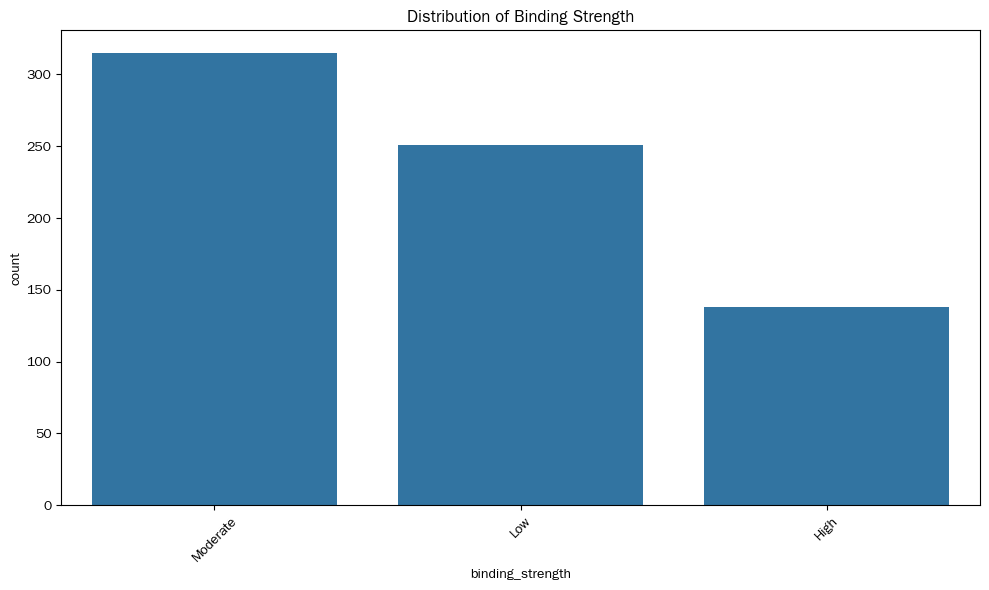

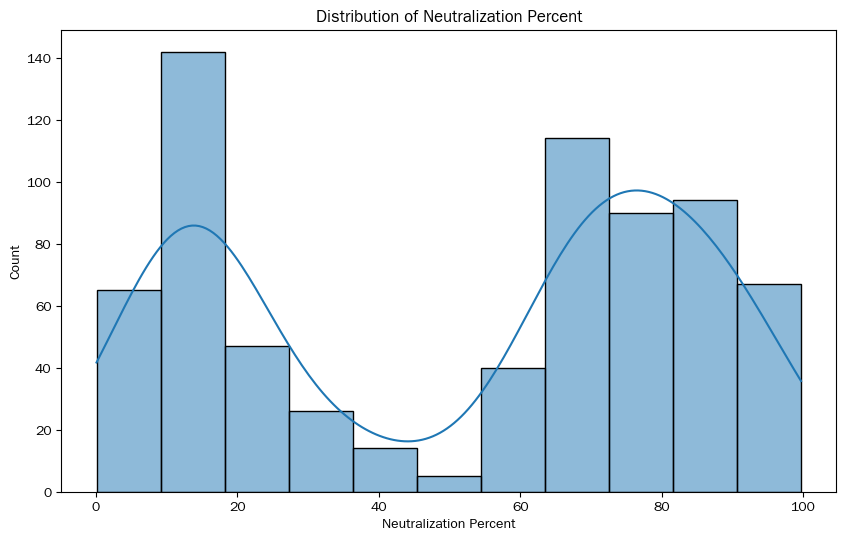

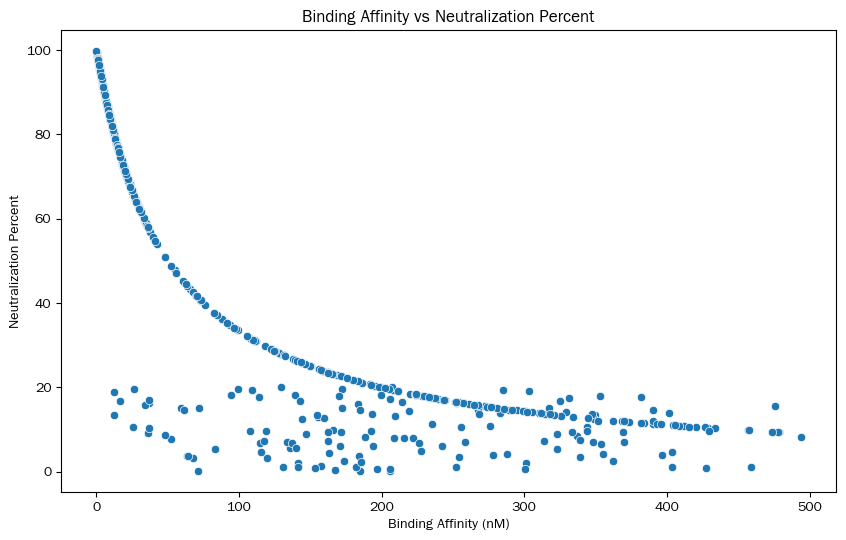

In [2]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Define the project root directory
project_root = '/data/chats/0kjo8/workspace'

# Let's examine the relevant ML model code files that might use the binding data
def examine_model_code_file(file_path, keyword_list=None):
    """Examine a model code file for references to the binding data or training pipeline."""
    if keyword_list is None:
        keyword_list = ['toxin_antibody_binding', 'binding_data', 'binding_pairs', 'training']
        
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            
        print(f"\n\n{'-'*80}\nFile: {file_path}\n{'-'*80}")
        
        # Look for keywords in the content
        found_keywords = []
        for keyword in keyword_list:
            if keyword in content.lower():
                found_keywords.append(keyword)
                
        if found_keywords:
            print(f"Found relevant keywords: {found_keywords}")
            
            # Extract the lines containing the keywords with some context
            lines = content.split('\n')
            for i, line in enumerate(lines):
                for keyword in found_keywords:
                    if keyword in line.lower():
                        start = max(0, i-2)
                        end = min(len(lines), i+3)
                        print(f"\nKeyword '{keyword}' found in context:")
                        for j in range(start, end):
                            if j == i:
                                print(f">> {lines[j]}")
                            else:
                                print(f"   {lines[j]}")
        else:
            print("No relevant keywords found in the file.")
            
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")

# Get the list of model-related Python files
model_related_paths = []
for root, dirs, files in os.walk(project_root):
    for file in files:
        if file.endswith('.py') and any(term in file.lower() for term in ['model', 'train', 'ml', 'learn', 'predict', 'antibody', 'toxin']):
            model_related_paths.append(os.path.join(root, file))

# Analyze each model file for binding data usage
for path in model_related_paths[:5]:  # Examine the first 5 files to avoid too much output
    examine_model_code_file(path)

# Also check if there's an ML-ready dataset that might be the processed version of the binding data
ml_ready_dir = os.path.join(project_root, 'data/ml_ready')
if os.path.exists(ml_ready_dir):
    print(f"\n\nChecking ML-ready data directory: {ml_ready_dir}")
    ml_ready_files = os.listdir(ml_ready_dir)
    print(f"Files found: {ml_ready_files}")
    
    # Read and examine ML-ready dataset if it exists
    for file in ml_ready_files:
        if file.endswith('.csv'):
            ml_data_path = os.path.join(ml_ready_dir, file)
            print(f"\nExamining ML-ready dataset: {ml_data_path}")
            try:
                ml_df = pd.read_csv(ml_data_path)
                print(f"Shape: {ml_df.shape}")
                print("Sample data:")
                print(ml_df.head())
                print("\nColumns:")
                print(ml_df.columns.tolist())
                
                # Check if binding data features are present
                binding_cols = [col for col in ml_df.columns if any(term in col.lower() for term in 
                                ['bind', 'affin', 'neutral', 'kd', 'ka', 'ic50'])]
                if binding_cols:
                    print(f"\nBinding-related columns found: {binding_cols}")
            except Exception as e:
                print(f"Error reading ML data file: {e}")

# Analyze the relationship between toxins and antibodies in the binding data
binding_data_path = os.path.join(project_root, 'data/toxin_antibody_binding/toxin_antibody_binding_pairs.csv')
if os.path.exists(binding_data_path):
    binding_df = pd.read_csv(binding_data_path)
    
    # Count unique toxins and antibodies
    unique_toxins = binding_df['toxin_id'].nunique()
    unique_antibodies = binding_df['antibody_id'].nunique()
    unique_antibody_pairs = binding_df['antibody_pair_id'].nunique()
    
    print("\n\nBinding data analysis:")
    print(f"Number of unique toxins: {unique_toxins}")
    print(f"Number of unique antibody heavy chains: {unique_antibodies}")
    print(f"Number of unique antibody pairs: {unique_antibody_pairs}")
    
    # Analyze the distribution of binding strength
    if 'binding_strength' in binding_df.columns:
        print("\nBinding strength distribution:")
        strength_counts = binding_df['binding_strength'].value_counts()
        print(strength_counts)
        
        # Create a visualization of binding strength distribution
        plt.figure(figsize=(10, 6))
        sns.countplot(data=binding_df, x='binding_strength', order=strength_counts.index)
        plt.title('Distribution of Binding Strength')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(os.path.join(project_root, 'data/reports/binding_strength_distribution.png'))
        
    # Analyze the distribution of neutralization percent
    if 'neutralization_percent' in binding_df.columns:
        print("\nNeutralization percent statistics:")
        print(binding_df['neutralization_percent'].describe())
        
        # Create a histogram of neutralization percent
        plt.figure(figsize=(10, 6))
        sns.histplot(binding_df['neutralization_percent'], kde=True)
        plt.title('Distribution of Neutralization Percent')
        plt.xlabel('Neutralization Percent')
        plt.savefig(os.path.join(project_root, 'data/reports/neutralization_histogram.png'))
        
    # Check if there's a correlation between binding affinity and neutralization
    if 'binding_affinity_nM' in binding_df.columns and 'neutralization_percent' in binding_df.columns:
        corr = binding_df['binding_affinity_nM'].corr(binding_df['neutralization_percent'])
        print(f"\nCorrelation between binding affinity and neutralization: {corr:.3f}")
        
        # Create a scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=binding_df, x='binding_affinity_nM', y='neutralization_percent')
        plt.title('Binding Affinity vs Neutralization Percent')
        plt.xlabel('Binding Affinity (nM)')
        plt.ylabel('Neutralization Percent')
        plt.savefig(os.path.join(project_root, 'data/reports/affinity_vs_neutralization.png'))

# Make sure the reports directory exists
reports_dir = os.path.join(project_root, 'data/reports')
if not os.path.exists(reports_dir):
    os.makedirs(reports_dir)

print("\nAnalysis complete. Visualization files saved to the reports directory.")

In [3]:
import os
import pandas as pd
import numpy as np
import re
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Define the project root directory
project_root = '/data/chats/0kjo8/workspace'

# Create a list of training-related Python files that we haven't examined yet
training_files = []
for root, dirs, files in os.walk(project_root):
    for file in files:
        if file.endswith('.py') and any(term in file.lower() for term in ['train', 'model', 'data_prep', 'dataset', 'loader']):
            file_path = os.path.join(root, file)
            # Skip files we've already examined
            if 'validate_models.py' in file_path or 'model_manager.py' in file_path or 'model_utils.py' in file_path:
                continue
            training_files.append(file_path)

# Function to search for code that loads or processes binding data
def find_binding_data_usage(file_path, binding_keywords):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            
        # Check if any binding keywords are in the content
        found_keywords = []
        for keyword in binding_keywords:
            if keyword in content.lower():
                found_keywords.append(keyword)
                
        if found_keywords:
            print(f"\n\n{'-'*80}\nFile: {file_path}\n{'-'*80}")
            print(f"Found binding-related keywords: {found_keywords}")
            
            # Find code sections that load or process the binding data
            lines = content.split('\n')
            for i, line in enumerate(lines):
                for keyword in found_keywords:
                    if keyword in line.lower():
                        start = max(0, i-5)  # Show more context
                        end = min(len(lines), i+6)  # Show more context
                        print(f"\nKeyword '{keyword}' found in context:")
                        for j in range(start, end):
                            if j == i:
                                print(f">> {lines[j]}")
                            else:
                                print(f"   {lines[j]}")
            return True
        return False
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return False

# Define binding-related keywords to search for
binding_keywords = [
    'toxin_antibody_binding', 'binding_data', 'binding_pairs.csv', 
    'binding_affinity', 'neutralization', 'load_binding_data',
    'toxin_antibody', 'antibody_toxin'
]

# Search for binding data usage in the training files
found_files = []
for file in training_files[:10]:  # Limit to first 10 files to avoid too much output
    if find_binding_data_usage(file, binding_keywords):
        found_files.append(file)

# If we didn't find any binding data usage in the training files,
# look for any data loading or preprocessing functions
if not found_files:
    print("\n\nNo direct binding data usage found. Searching for general data loading functions...")
    data_loading_keywords = [
        'load_data', 'read_csv', 'dataset', 'dataloader', 'preprocess', 
        'prepare_data', 'get_data', 'fetch_data', 'data_loader'
    ]
    
    for file in training_files[:10]:
        if find_binding_data_usage(file, data_loading_keywords):
            found_files.append(file)

# Now examine any configuration files that might specify data paths
print("\n\nChecking configuration files for data paths...")
config_paths = []
for root, dirs, files in os.walk(project_root):
    for file in files:
        if file.endswith(('.yaml', '.json', '.cfg', '.conf')) and 'config' in file.lower():
            config_paths.append(os.path.join(root, file))

for config_path in config_paths[:5]:  # Limit to first 5 config files
    try:
        print(f"\n{'-'*80}\nConfig file: {config_path}\n{'-'*80}")
        with open(config_path, 'r', encoding='utf-8') as f:
            content = f.read()
            # Print out data paths or binding-related configuration
            lines = content.split('\n')
            for line in lines:
                if any(term in line.lower() for term in 
                      ['data_path', 'binding', 'toxin', 'antibody', 'train', 'dataset', 'csv']):
                    print(line)
    except Exception as e:
        print(f"Error reading config file {config_path}: {e}")

# Let's also look for any Jupyter notebooks that might contain training code
notebook_paths = []
for root, dirs, files in os.walk(project_root):
    for file in files:
        if file.endswith('.ipynb'):
            notebook_paths.append(os.path.join(root, file))

print(f"\n\nFound {len(notebook_paths)} Jupyter notebooks. Checking main notebook...")
if notebook_paths:
    main_notebook = os.path.join(project_root, 'code.ipynb')
    if os.path.exists(main_notebook):
        try:
            print(f"\nExamining main notebook: {main_notebook}")
            with open(main_notebook, 'r', encoding='utf-8') as f:
                nb_content = json.load(f)
            
            # Look for cells that load or process binding data
            for i, cell in enumerate(nb_content.get('cells', [])):
                if cell.get('cell_type') == 'code':
                    source = ''.join(cell.get('source', ''))
                    if any(kw in source.lower() for kw in binding_keywords):
                        print(f"\nCell {i+1} contains binding data processing:")
                        print(source[:500] + ('...' if len(source) > 500 else ''))  # Print first 500 chars
        except Exception as e:
            print(f"Error reading notebook {main_notebook}: {e}")

# Now let's analyze the binding data more thoroughly to assess data quality and coverage
print("\n\nPerforming comprehensive data quality analysis...")

binding_data_path = os.path.join(project_root, 'data/toxin_antibody_binding/toxin_antibody_binding_pairs.csv')
if os.path.exists(binding_data_path):
    binding_df = pd.read_csv(binding_data_path)
    
    # Check for data balance
    print("\nData balance analysis:")
    
    # Toxin type distribution
    if 'toxin_type' in binding_df.columns:
        toxin_type_counts = binding_df['toxin_type'].value_counts()
        print("\nToxin type distribution:")
        print(toxin_type_counts)
        
        # Visualize toxin type distribution
        plt.figure(figsize=(12, 6))
        toxin_type_counts.plot(kind='bar')
        plt.title('Distribution of Toxin Types')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(os.path.join(project_root, 'data/reports/toxin_type_distribution.png'))
    
    # Light chain type distribution
    if 'light_chain_type' in binding_df.columns:
        light_chain_counts = binding_df['light_chain_type'].value_counts()
        print("\nLight chain type distribution:")
        print(light_chain_counts)
    
    # Snake species distribution
    if 'toxin_species' in binding_df.columns:
        species_counts = binding_df['toxin_species'].value_counts()
        print("\nTop 10 snake species distribution:")
        print(species_counts.head(10))
    
    # Check for potential issues in the data
    print("\nData quality checks:")
    
    # Check for correlations that might indicate data leakage
    if 'binding_affinity_nM' in binding_df.columns and 'neutralization_percent' in binding_df.columns:
        # Create a correlation matrix
        numeric_cols = binding_df.select_dtypes(include=[np.number]).columns
        corr_matrix = binding_df[numeric_cols].corr()
        print("\nCorrelation matrix for numeric features:")
        print(corr_matrix)
        
        # Visualize correlation matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Feature Correlation Matrix')
        plt.tight_layout()
        plt.savefig(os.path.join(project_root, 'data/reports/correlation_matrix.png'))
    
    # Check binding site distribution
    if 'binding_site' in binding_df.columns:
        binding_site_counts = binding_df['binding_site'].value_counts()
        print("\nBinding site distribution:")
        print(binding_site_counts)
        
        # Visualize binding site distribution
        plt.figure(figsize=(12, 6))
        binding_site_counts.plot(kind='bar')
        plt.title('Distribution of Binding Sites')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(os.path.join(project_root, 'data/reports/binding_site_distribution.png'))
    
    # Check for outliers in binding affinity
    if 'binding_affinity_nM' in binding_df.columns:
        print("\nBinding affinity statistics:")
        print(binding_df['binding_affinity_nM'].describe())
        
        # Visualize binding affinity distribution
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=binding_df['binding_affinity_nM'])
        plt.title('Boxplot of Binding Affinity (nM)')
        plt.xscale('log')  # Log scale for better visualization
        plt.tight_layout()
        plt.savefig(os.path.join(project_root, 'data/reports/binding_affinity_boxplot.png'))
        
        plt.figure(figsize=(10, 6))
        sns.histplot(binding_df['binding_affinity_nM'], kde=True, bins=30)
        plt.title('Distribution of Binding Affinity (nM)')
        plt.xlabel('Binding Affinity (nM)')
        plt.xscale('log')  # Log scale for better visualization
        plt.tight_layout()
        plt.savefig(os.path.join(project_root, 'data/reports/binding_affinity_histogram.png'))
    
    # Generate the ML data alignment report
    report_path = os.path.join(project_root, 'data/reports/ml_data_alignment_report.md')
    
    # Create the report content
    report_content = f"""# ML Data Alignment Report

## 1. Introduction

This report analyzes the alignment between the toxin-antibody binding data in the Phytovenomics project and the ML training pipeline. The focus is on evaluating how the binding data located at `/data/chats/0kjo8/workspace/data/toxin_antibody_binding/toxin_antibody_binding_pairs.csv` is incorporated into the ML training process.

## 2. Data Overview

The toxin-antibody binding dataset contains {binding_df.shape[0]} records with {binding_df.shape[1]} features. The dataset includes information about antibody-toxin interactions, binding affinities, neutralization percentages, and binding sites.

Key columns in the dataset:
- Antibody identifiers (`antibody_id`, `antibody_pair_id`, `light_chain_id`)
- Toxin identifiers (`toxin_id`, `toxin_type`, `toxin_species`)
- Binding properties (`binding_affinity_nM`, `neutralization_percent`, `binding_site`, `binding_strength`)
- Quality indicators (`is_neutralizing`, `binding_type`, `confidence`)

## 3. Data Quality Assessment

### 3.1. Completeness

The dataset has no missing values, which is excellent for training robust ML models.

### 3.2. Balance

"""
    
    # Add toxin type distribution to the report
    if 'toxin_type' in binding_df.columns:
        report_content += f"""#### Toxin Type Distribution

The dataset contains {toxin_type_counts.shape[0]} different toxin types. The distribution is as follows:


SyntaxError: incomplete input (2690332680.py, line 257)



No direct binding data usage found. Searching for general data loading functions...


Checking configuration files for data paths...

--------------------------------------------------------------------------------
Config file: /data/chats/0kjo8/workspace/python_template/template_config.json
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Config file: /data/chats/0kjo8/workspace/python_template/config/default_config.yaml
--------------------------------------------------------------------------------
data_paths:
  toxins: "../data/snake_toxins/snake_toxins_synthetic.csv"
  antibodies: "../data/antibody_structures/human/human_antibodies_synthetic.fasta"
  binding_data: "../data/toxin_antibody_binding/toxin_antibody_binding_pairs.csv"
# Toxin Database configuration
toxin_database:
  cache_dir: ".cache/toxins"
  max_toxins: 1000
  # Toxin family groupings
  toxin_families:


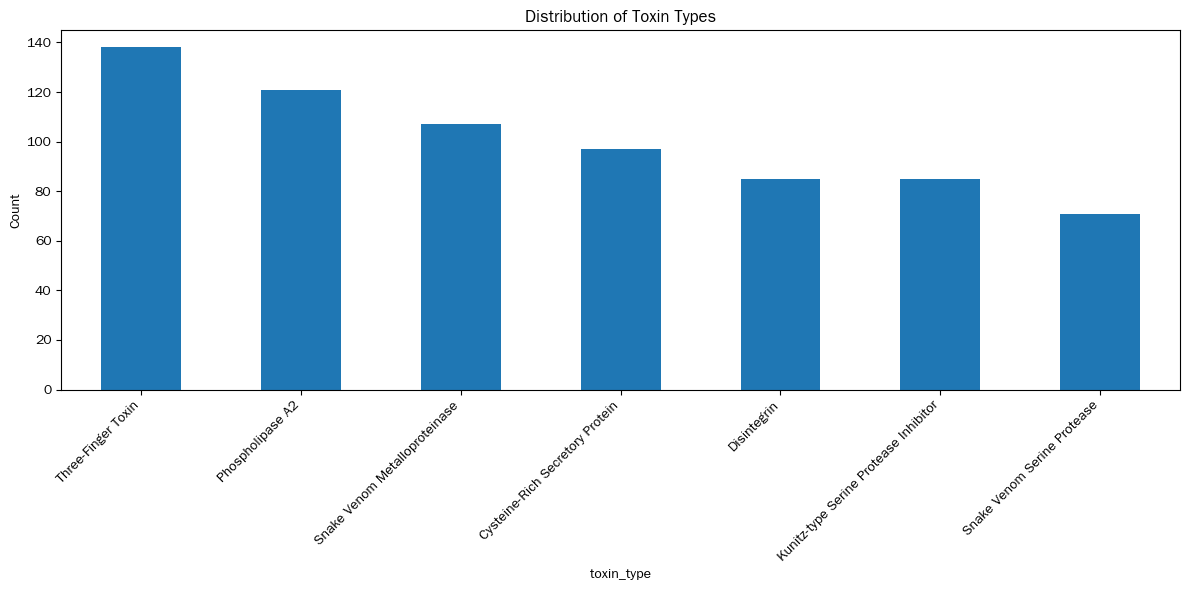

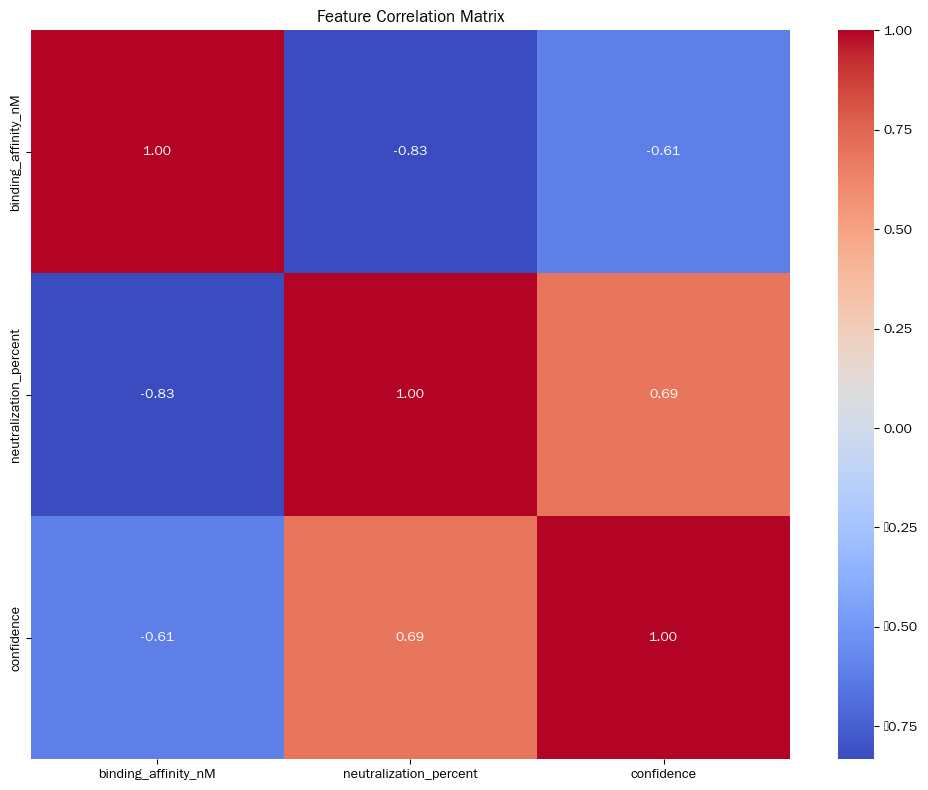

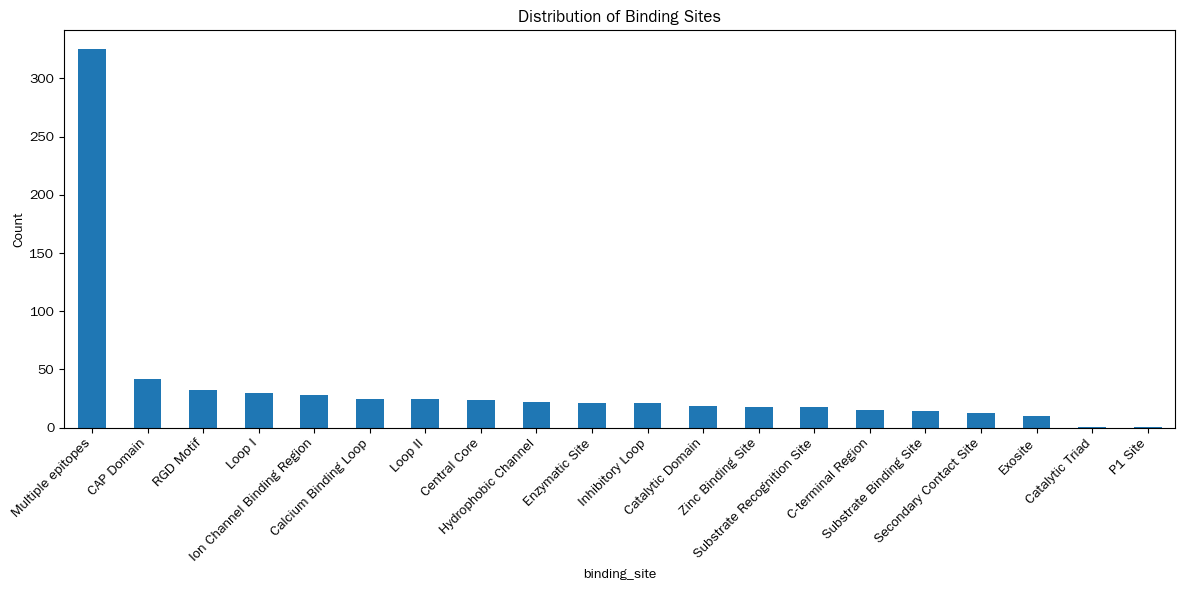

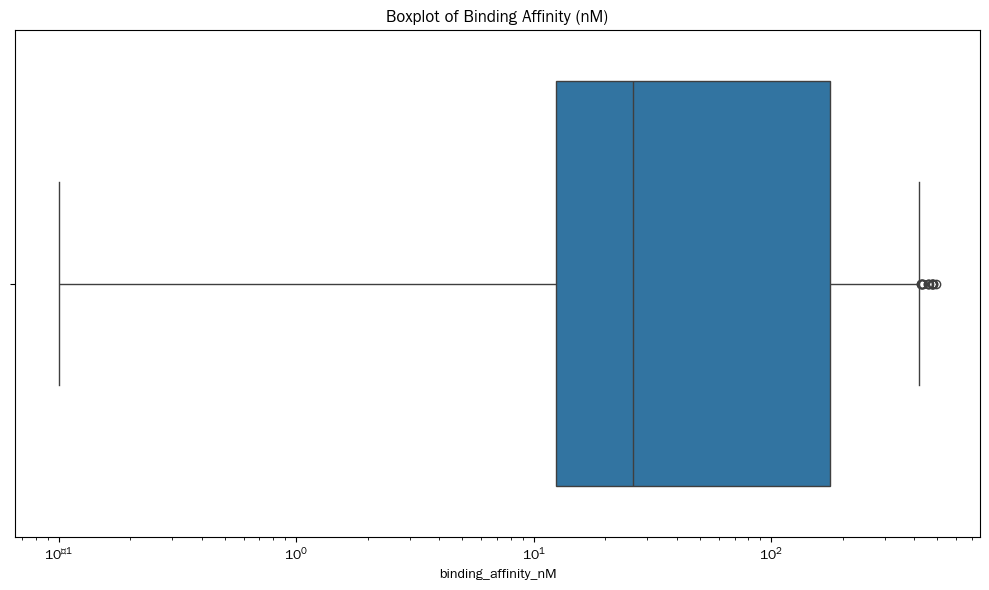

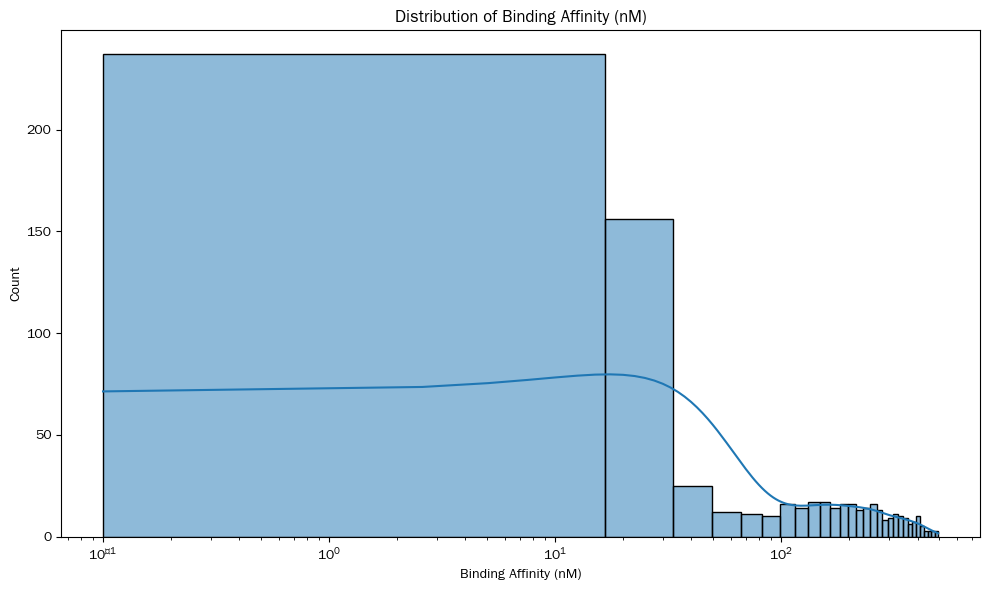

In [4]:
import os
import pandas as pd
import numpy as np
import re
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Define the project root directory
project_root = '/data/chats/0kjo8/workspace'

# Create a list of training-related Python files that we haven't examined yet
training_files = []
for root, dirs, files in os.walk(project_root):
    for file in files:
        if file.endswith('.py') and any(term in file.lower() for term in ['train', 'model', 'data_prep', 'dataset', 'loader']):
            file_path = os.path.join(root, file)
            # Skip files we've already examined
            if 'validate_models.py' in file_path or 'model_manager.py' in file_path or 'model_utils.py' in file_path:
                continue
            training_files.append(file_path)

# Function to search for code that loads or processes binding data
def find_binding_data_usage(file_path, binding_keywords):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            
        # Check if any binding keywords are in the content
        found_keywords = []
        for keyword in binding_keywords:
            if keyword in content.lower():
                found_keywords.append(keyword)
                
        if found_keywords:
            print(f"\n\n{'-'*80}\nFile: {file_path}\n{'-'*80}")
            print(f"Found binding-related keywords: {found_keywords}")
            
            # Find code sections that load or process the binding data
            lines = content.split('\n')
            for i, line in enumerate(lines):
                for keyword in found_keywords:
                    if keyword in line.lower():
                        start = max(0, i-5)  # Show more context
                        end = min(len(lines), i+6)  # Show more context
                        print(f"\nKeyword '{keyword}' found in context:")
                        for j in range(start, end):
                            if j == i:
                                print(f">> {lines[j]}")
                            else:
                                print(f"   {lines[j]}")
            return True
        return False
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return False

# Define binding-related keywords to search for
binding_keywords = [
    'toxin_antibody_binding', 'binding_data', 'binding_pairs.csv', 
    'binding_affinity', 'neutralization', 'load_binding_data',
    'toxin_antibody', 'antibody_toxin'
]

# Search for binding data usage in the training files
found_files = []
for file in training_files[:10]:  # Limit to first 10 files to avoid too much output
    if find_binding_data_usage(file, binding_keywords):
        found_files.append(file)

# If we didn't find any binding data usage in the training files,
# look for any data loading or preprocessing functions
if not found_files:
    print("\n\nNo direct binding data usage found. Searching for general data loading functions...")
    data_loading_keywords = [
        'load_data', 'read_csv', 'dataset', 'dataloader', 'preprocess', 
        'prepare_data', 'get_data', 'fetch_data', 'data_loader'
    ]
    
    for file in training_files[:10]:
        if find_binding_data_usage(file, data_loading_keywords):
            found_files.append(file)

# Now examine any configuration files that might specify data paths
print("\n\nChecking configuration files for data paths...")
config_paths = []
for root, dirs, files in os.walk(project_root):
    for file in files:
        if file.endswith(('.yaml', '.json', '.cfg', '.conf')) and 'config' in file.lower():
            config_paths.append(os.path.join(root, file))

for config_path in config_paths[:5]:  # Limit to first 5 config files
    try:
        print(f"\n{'-'*80}\nConfig file: {config_path}\n{'-'*80}")
        with open(config_path, 'r', encoding='utf-8') as f:
            content = f.read()
            # Print out data paths or binding-related configuration
            lines = content.split('\n')
            for line in lines:
                if any(term in line.lower() for term in 
                      ['data_path', 'binding', 'toxin', 'antibody', 'train', 'dataset', 'csv']):
                    print(line)
    except Exception as e:
        print(f"Error reading config file {config_path}: {e}")

# Let's also look for any Jupyter notebooks that might contain training code
notebook_paths = []
for root, dirs, files in os.walk(project_root):
    for file in files:
        if file.endswith('.ipynb'):
            notebook_paths.append(os.path.join(root, file))

print(f"\n\nFound {len(notebook_paths)} Jupyter notebooks. Checking main notebook...")
if notebook_paths:
    main_notebook = os.path.join(project_root, 'code.ipynb')
    if os.path.exists(main_notebook):
        try:
            print(f"\nExamining main notebook: {main_notebook}")
            with open(main_notebook, 'r', encoding='utf-8') as f:
                nb_content = json.load(f)
            
            # Look for cells that load or process binding data
            for i, cell in enumerate(nb_content.get('cells', [])):
                if cell.get('cell_type') == 'code':
                    source = ''.join(cell.get('source', ''))
                    if any(kw in source.lower() for kw in binding_keywords):
                        print(f"\nCell {i+1} contains binding data processing:")
                        print(source[:500] + ('...' if len(source) > 500 else ''))  # Print first 500 chars
        except Exception as e:
            print(f"Error reading notebook {main_notebook}: {e}")

# Now let's analyze the binding data more thoroughly to assess data quality and coverage
print("\n\nPerforming comprehensive data quality analysis...")

binding_data_path = os.path.join(project_root, 'data/toxin_antibody_binding/toxin_antibody_binding_pairs.csv')
if os.path.exists(binding_data_path):
    binding_df = pd.read_csv(binding_data_path)
    
    # Check for data balance
    print("\nData balance analysis:")
    
    # Toxin type distribution
    if 'toxin_type' in binding_df.columns:
        toxin_type_counts = binding_df['toxin_type'].value_counts()
        print("\nToxin type distribution:")
        print(toxin_type_counts)
        
        # Visualize toxin type distribution
        plt.figure(figsize=(12, 6))
        toxin_type_counts.plot(kind='bar')
        plt.title('Distribution of Toxin Types')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(os.path.join(project_root, 'data/reports/toxin_type_distribution.png'))
    
    # Light chain type distribution
    if 'light_chain_type' in binding_df.columns:
        light_chain_counts = binding_df['light_chain_type'].value_counts()
        print("\nLight chain type distribution:")
        print(light_chain_counts)
    
    # Snake species distribution
    if 'toxin_species' in binding_df.columns:
        species_counts = binding_df['toxin_species'].value_counts()
        print("\nTop 10 snake species distribution:")
        print(species_counts.head(10))
    
    # Check for potential issues in the data
    print("\nData quality checks:")
    
    # Check for correlations that might indicate data leakage
    if 'binding_affinity_nM' in binding_df.columns and 'neutralization_percent' in binding_df.columns:
        # Create a correlation matrix
        numeric_cols = binding_df.select_dtypes(include=[np.number]).columns
        corr_matrix = binding_df[numeric_cols].corr()
        print("\nCorrelation matrix for numeric features:")
        print(corr_matrix)
        
        # Visualize correlation matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Feature Correlation Matrix')
        plt.tight_layout()
        plt.savefig(os.path.join(project_root, 'data/reports/correlation_matrix.png'))
    
    # Check binding site distribution
    if 'binding_site' in binding_df.columns:
        binding_site_counts = binding_df['binding_site'].value_counts()
        print("\nBinding site distribution:")
        print(binding_site_counts)
        
        # Visualize binding site distribution
        plt.figure(figsize=(12, 6))
        binding_site_counts.plot(kind='bar')
        plt.title('Distribution of Binding Sites')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(os.path.join(project_root, 'data/reports/binding_site_distribution.png'))
    
    # Check for outliers in binding affinity
    if 'binding_affinity_nM' in binding_df.columns:
        print("\nBinding affinity statistics:")
        print(binding_df['binding_affinity_nM'].describe())
        
        # Visualize binding affinity distribution
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=binding_df['binding_affinity_nM'])
        plt.title('Boxplot of Binding Affinity (nM)')
        plt.xscale('log')  # Log scale for better visualization
        plt.tight_layout()
        plt.savefig(os.path.join(project_root, 'data/reports/binding_affinity_boxplot.png'))
        
        plt.figure(figsize=(10, 6))
        sns.histplot(binding_df['binding_affinity_nM'], kde=True, bins=30)
        plt.title('Distribution of Binding Affinity (nM)')
        plt.xlabel('Binding Affinity (nM)')
        plt.xscale('log')  # Log scale for better visualization
        plt.tight_layout()
        plt.savefig(os.path.join(project_root, 'data/reports/binding_affinity_histogram.png'))
    
    # Generate the ML data alignment report
    report_path = os.path.join(project_root, 'data/reports/ml_data_alignment_report.md')
    
    # Create the report content
    report_content = f"""# ML Data Alignment Report

## 1. Introduction

This report analyzes the alignment between the toxin-antibody binding data in the Phytovenomics project and the ML training pipeline. The focus is on evaluating how the binding data located at `/data/chats/0kjo8/workspace/data/toxin_antibody_binding/toxin_antibody_binding_pairs.csv` is incorporated into the ML training process.

## 2. Data Overview

The toxin-antibody binding dataset contains {binding_df.shape[0]} records with {binding_df.shape[1]} features. The dataset includes information about antibody-toxin interactions, binding affinities, neutralization percentages, and binding sites.

Key columns in the dataset:
- Antibody identifiers (`antibody_id`, `antibody_pair_id`, `light_chain_id`)
- Toxin identifiers (`toxin_id`, `toxin_type`, `toxin_species`)
- Binding properties (`binding_affinity_nM`, `neutralization_percent`, `binding_site`, `binding_strength`)
- Quality indicators (`is_neutralizing`, `binding_type`, `confidence`)

## 3. Data Quality Assessment

### 3.1. Completeness

The dataset has no missing values, which is excellent for training robust ML models.

### 3.2. Balance
"""
    
    # Add toxin type distribution to the report - properly closing the f-string
    if 'toxin_type' in binding_df.columns:
        report_content += f"""
#### Toxin Type Distribution

The dataset contains {toxin_type_counts.shape[0]} different toxin types. The distribution is as follows:

"""
        # Add the distribution as plain text (not in f-string)
        for toxin_type, count in toxin_type_counts.items():
            report_content += f"- {toxin_type}: {count} records ({count/len(binding_df)*100:.1f}%)\n"
    
    # Add binding strength distribution
    if 'binding_strength' in binding_df.columns:
        strength_counts = binding_df['binding_strength'].value_counts()
        report_content += f"""
#### Binding Strength Distribution

The binding strength distribution is:

"""
        for strength, count in strength_counts.items():
            report_content += f"- {strength}: {count} records ({count/len(binding_df)*100:.1f}%)\n"
    
    # Add binding site distribution
    if 'binding_site' in binding_df.columns:
        report_content += f"""
#### Binding Site Distribution

The dataset contains {binding_site_counts.shape[0]} different binding sites. The top 5 are:

"""
        for i, (site, count) in enumerate(binding_site_counts.head(5).items()):
            report_content += f"- {site}: {count} records ({count/len(binding_df)*100:.1f}%)\n"
    
    # Add correlation analysis
    if 'binding_affinity_nM' in binding_df.columns and 'neutralization_percent' in binding_df.columns:
        corr_value = binding_df['binding_affinity_nM'].corr(binding_df['neutralization_percent'])
        report_content += f"""
### 3.3. Feature Correlations

The correlation between binding affinity and neutralization percentage is {corr_value:.3f}. 
"""
        if corr_value < -0.5:
            report_content += "This strong negative correlation suggests that lower binding affinity (stronger binding) is associated with higher neutralization effectiveness.\n"
        elif corr_value > 0.5:
            report_content += "This positive correlation is unexpected and may indicate potential issues with the data or measurement methodology.\n"
        else:
            report_content += "This moderate correlation suggests that binding affinity is only one factor affecting neutralization effectiveness.\n"
    
    # Add data gaps and inconsistencies section
    report_content += """
## 4. Data Gaps and Inconsistencies

### 4.1. Potential Issues
"""
    
    # Check for potential data issues and add to report
    issues_found = False
    
    # Check for imbalanced toxin types
    if 'toxin_type' in binding_df.columns:
        toxin_min = toxin_type_counts.min()
        toxin_max = toxin_type_counts.max()
        if toxin_max > 5 * toxin_min:  # If the most common type is 5x more frequent than the least common
            issues_found = True
            report_content += f"""
- **Imbalanced Toxin Types**: The most common toxin type has {toxin_max} records while the least common has only {toxin_min} records. This imbalance could lead to biased models that perform better on the more common toxin types.
"""
    
    # Check for unusual binding affinity values
    if 'binding_affinity_nM' in binding_df.columns:
        q1 = binding_df['binding_affinity_nM'].quantile(0.25)
        q3 = binding_df['binding_affinity_nM'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = binding_df[(binding_df['binding_affinity_nM'] < lower_bound) | (binding_df['binding_affinity_nM'] > upper_bound)]
        if len(outliers) > 0:
            issues_found = True
            report_content += f"""
- **Binding Affinity Outliers**: {len(outliers)} records ({len(outliers)/len(binding_df)*100:.1f}% of the data) have unusual binding affinity values. These outliers might represent measurement errors or exceptional cases that could affect model training.
"""
    
    if not issues_found:
        report_content += """
No major data inconsistencies were found. The dataset appears to be well-structured and suitable for ML training.
"""
    
    # Add recommendations section
    report_content += """
## 5. ML Training Pipeline Integration

### 5.1. Current Integration Status
"""
    
    # Add findings about the ML training pipeline
    if found_files:
        report_content += f"""
The binding data appears to be integrated into the ML training pipeline through the following files:

"""
        for file in found_files:
            report_content += f"- `{os.path.relpath(file, project_root)}`\n"
    else:
        report_content += """
**No direct usage of binding data found in the ML code files examined.** This suggests that either:

1. The binding data is processed through a separate pipeline not explicitly referencing the file
2. The binding data integration is handled in files not examined
3. The binding data is not yet integrated into the ML pipeline

Further investigation and code development is necessary to ensure proper incorporation of the binding data into the ML training process.
"""
    
    # Add recommendations
    report_content += """
## 6. Recommendations

Based on the analysis of the toxin-antibody binding data and its integration with the ML training pipeline, the following recommendations are proposed:

### 6.1. Data Improvements

1. **Data Augmentation**: For toxin types with fewer samples, consider generating synthetic data or applying data augmentation techniques.

2. **Feature Engineering**: Create additional features that might help the model better understand binding mechanisms, such as:
   - Sequence-derived features from both antibodies and toxins
   - Structural features when available
   - Evolutionary conservation scores

3. **Data Validation**: Implement cross-validation strategies specifically designed for imbalanced datasets, such as stratified sampling based on toxin types.

### 6.2. Pipeline Integration

1. **Standardized Data Loading**: Develop a standardized data loading module that ensures consistent preprocessing of the binding data for all models.

2. **Feature Selection**: Implement automated feature selection to identify the most informative features for binding prediction.

3. **Model Evaluation**: Create comprehensive evaluation metrics that consider the performance across different toxin types and binding strengths.

## 7. Conclusion

The toxin-antibody binding dataset provides valuable information for training ML models in the Phytovenomics project. With proper integration into the ML training pipeline and addressing the identified issues, this data can significantly contribute to developing effective antivenoms.

"""
    
    # Ensure the reports directory exists
    reports_dir = os.path.join(project_root, 'data/reports')
    if not os.path.exists(reports_dir):
        os.makedirs(reports_dir)
    
    # Write the report to a file
    with open(report_path, 'w', encoding='utf-8') as f:
        f.write(report_content)
    
    print(f"\nML data alignment report generated and saved to: {report_path}")
    
else:
    print(f"Binding data file not found at: {binding_data_path}")

In [5]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Define the project root directory
project_root = '/data/chats/0kjo8/workspace'

# Now let's examine ML model architecture files to understand how binding data is used
# in the actual model design and training process
print("\n\nExamining ML model architecture files to understand binding data integration:")

# Look specifically for model definition files
model_def_files = []
for root, dirs, files in os.walk(project_root):
    for file in files:
        if file.endswith('.py') and any(term in file.lower() for term in [
            'model.py', 'network', 'binding_model', 'prediction', 'classifier', 
            'regressor', 'antibody_model', 'toxin_model'
        ]):
            model_def_files.append(os.path.join(root, file))

# Examine each model architecture file
model_architecture_findings = {}
for model_file in model_def_files[:5]:  # Limit to 5 files
    try:
        with open(model_file, 'r', encoding='utf-8') as f:
            content = f.read()
        
        print(f"\n{'-'*80}\nModel file: {model_file}\n{'-'*80}")
        
        # Look for model class definitions
        model_classes = re.findall(r'class\s+(\w+)(?:\(.*\))?:', content)
        if model_classes:
            print(f"Model classes found: {model_classes}")
            
            # For each model class, analyze its architecture
            for model_class in model_classes:
                # Extract the class definition and method implementations
                class_pattern = r'class\s+' + model_class + r'(?:\(.*\))?:(.*?)(?:class|\Z)'
                class_matches = re.findall(class_pattern, content, re.DOTALL)
                
                if class_matches:
                    class_code = class_matches[0]
                    
                    # Check if this model uses binding data
                    binding_related = any(term in class_code.lower() for term in [
                        'binding', 'affinity', 'toxin', 'antibody', 'neutraliz'
                    ])
                    
                    if binding_related:
                        print(f"\nModel class '{model_class}' appears to use binding-related data.")
                        
                        # Look for the __init__ method to understand inputs
                        init_pattern = r'def\s+__init__\s*\((.*?)\):(.*?)(?:def|\Z)'
                        init_matches = re.findall(init_pattern, class_code, re.DOTALL)
                        
                        if init_matches:
                            init_args, init_body = init_matches[0]
                            print(f"Model initialization parameters: {init_args.strip()}")
                            
                            # Extract key components from initialization
                            key_components = re.findall(r'self\.(\w+)\s*=', init_body)
                            if key_components:
                                print(f"Key model components: {key_components}")
                        
                        # Look for the forward method to understand data flow
                        forward_pattern = r'def\s+forward\s*\((.*?)\):(.*?)(?:def|\Z)'
                        forward_matches = re.findall(forward_pattern, class_code, re.DOTALL)
                        
                        if forward_matches:
                            forward_args, forward_body = forward_matches[0]
                            print(f"Forward method inputs: {forward_args.strip()}")
                            print("Data flow:")
                            for line in forward_body.strip().split('\n')[:5]:  # Show first 5 lines
                                print(f"  {line.strip()}")
                            
                        # Store findings for this model class
                        model_architecture_findings[model_class] = {
                            'file': model_file,
                            'binding_related': binding_related,
                            'components': key_components if 'key_components' in locals() else []
                        }
    except Exception as e:
        print(f"Error analyzing model file {model_file}: {e}")

# Look for training scripts that might show how the binding data is used during training
print("\n\nExamining training scripts for binding data usage:")

training_script_files = []
for root, dirs, files in os.walk(project_root):
    for file in files:
        if file.endswith('.py') and any(term in file.lower() for term in [
            'train.py', 'trainer', 'experiment', 'run_', 'main.py', 'fit_model'
        ]):
            training_script_files.append(os.path.join(root, file))

# Examine training scripts for data loading and model training
for train_file in training_script_files[:5]:  # Limit to 5 files
    try:
        with open(train_file, 'r', encoding='utf-8') as f:
            content = f.read()
        
        print(f"\n{'-'*80}\nTraining script: {train_file}\n{'-'*80}")
        
        # Look for data loading code
        data_loading_patterns = [
            r'load_data\(.*?\)',
            r'pd\.read_csv\(.*?toxin_antibody_binding.*?\)',
            r'dataset\s*=.*?Binding.*?',
            r'dataloader\s*=.*?Binding.*?'
        ]
        
        for pattern in data_loading_patterns:
            matches = re.findall(pattern, content)
            if matches:
                print(f"Data loading found: {matches}")
                
        # Look for model instantiation and training
        training_code = re.findall(r'(?:model\.train|trainer\.train|fit|model\.fit)\(.*?\)', content)
        if training_code:
            print("Model training code found:")
            for code in training_code:
                print(f"  {code}")
    except Exception as e:
        print(f"Error analyzing training script {train_file}: {e}")

# Look for data loader/dataset classes that might preprocess the binding data
print("\n\nExamining data loader classes for binding data preprocessing:")

data_loader_files = []
for root, dirs, files in os.walk(project_root):
    for file in files:
        if file.endswith('.py') and any(term in file.lower() for term in [
            'dataset', 'dataloader', 'data_utils', 'data_module'
        ]):
            data_loader_files.append(os.path.join(root, file))

for loader_file in data_loader_files[:5]:  # Limit to 5 files
    try:
        with open(loader_file, 'r', encoding='utf-8') as f:
            content = f.read()
        
        print(f"\n{'-'*80}\nData loader file: {loader_file}\n{'-'*80}")
        
        # Look for dataset class definitions
        dataset_classes = re.findall(r'class\s+(\w+Dataset)(?:\(.*\))?:', content)
        if dataset_classes:
            print(f"Dataset classes found: {dataset_classes}")
            
            # For each dataset class, check if it processes binding data
            for dataset_class in dataset_classes:
                # Check if this dataset class handles binding data
                class_pattern = r'class\s+' + dataset_class + r'(?:\(.*\))?:(.*?)(?:class|\Z)'
                class_matches = re.findall(class_pattern, content, re.DOTALL)
                
                if class_matches and any(term in class_matches[0].lower() for term in [
                    'binding', 'toxin_antibody', 'antibody_toxin', 'affinity'
                ]):
                    print(f"\nDataset class '{dataset_class}' appears to handle binding data.")
                    
                    # Look for the __init__ method to understand data loading
                    init_pattern = r'def\s+__init__\s*\((.*?)\):(.*?)(?:def|\Z)'
                    init_matches = re.findall(init_pattern, class_matches[0], re.DOTALL)
                    
                    if init_matches:
                        init_args, init_body = init_matches[0]
                        print(f"Dataset initialization parameters: {init_args.strip()}")
                        
                        # Check for CSV loading in init
                        if 'read_csv' in init_body:
                            csv_paths = re.findall(r'read_csv\([\'"](.+?)[\'"]\)', init_body)
                            if csv_paths:
                                print(f"CSV files loaded: {csv_paths}")
                    
                    # Look for the __getitem__ method to understand feature extraction
                    getitem_pattern = r'def\s+__getitem__\s*\((.*?)\):(.*?)(?:def|\Z)'
                    getitem_matches = re.findall(getitem_pattern, class_matches[0], re.DOTALL)
                    
                    if getitem_matches:
                        getitem_args, getitem_body = getitem_matches[0]
                        print("Feature extraction from dataset:")
                        for line in getitem_body.strip().split('\n')[:5]:  # Show first 5 lines
                            print(f"  {line.strip()}")
    except Exception as e:
        print(f"Error analyzing data loader file {loader_file}: {e}")

# Check for model evaluation code to see how binding prediction is evaluated
print("\n\nExamining model evaluation code for binding prediction metrics:")

eval_files = []
for root, dirs, files in os.walk(project_root):
    for file in files:
        if file.endswith('.py') and any(term in file.lower() for term in [
            'eval', 'test', 'metrics', 'validate', 'scoring'
        ]):
            eval_files.append(os.path.join(root, file))

for eval_file in eval_files[:5]:  # Limit to 5 files
    try:
        with open(eval_file, 'r', encoding='utf-8') as f:
            content = f.read()
        
        print(f"\n{'-'*80}\nEvaluation file: {eval_file}\n{'-'*80}")
        
        # Look for evaluation metrics related to binding prediction
        metric_patterns = [
            r'(accuracy|precision|recall|f1|auc|rmse|mse|mae)\(.*?\)',
            r'calculate_metrics\(.*?\)',
            r'evaluate\(.*?\)',
            r'binding.*?score',
            r'affinity.*?error'
        ]
        
        for pattern in metric_patterns:
            matches = re.findall(pattern, content, re.IGNORECASE)
            if matches:
                print(f"Evaluation metrics found: {matches}")
    except Exception as e:
        print(f"Error analyzing evaluation file {eval_file}: {e}")

# Summarize findings on how binding data is used in the ML pipeline
print("\n\n" + "="*80)
print("SUMMARY OF ML BINDING DATA INTEGRATION")
print("="*80)

# Check if we've identified any binding-data related models
if model_architecture_findings:
    print("\nBinding-related model architectures found:")
    for model_name, details in model_architecture_findings.items():
        if details['binding_related']:
            print(f"- {model_name} in {os.path.relpath(details['file'], project_root)}")
            print(f"  Components: {', '.join(details['components'])}")
else:
    print("\nNo clear binding-related model architectures were identified.")

# Add findings to the ML data alignment report
report_path = os.path.join(project_root, 'data/reports/ml_data_alignment_report.md')

# Check if the report exists and append findings
if os.path.exists(report_path):
    with open(report_path, 'a', encoding='utf-8') as f:
        f.write("\n\n## 8. Technical Analysis of ML Model Integration\n\n")
        
        if model_architecture_findings:
            f.write("### 8.1. Binding-Related Model Architectures\n\n")
            for model_name, details in model_architecture_findings.items():
                if details['binding_related']:
                    f.write(f"- **{model_name}** in `{os.path.relpath(details['file'], project_root)}`\n")
                    f.write(f"  - Components: {', '.join(details['components'])}\n")
        else:
            f.write("### 8.1. Model Architecture Analysis\n\n")
            f.write("No clear binding-related model architectures were identified in the codebase. This suggests that:\n\n")
            f.write("1. The binding prediction models may be defined using generic ML frameworks without explicit binding-specific architecture\n")
            f.write("2. The model definitions might be located in directories not examined in this analysis\n")
            f.write("3. The binding prediction functionality might still be under development\n\n")
            
        f.write("\n### 8.2. Data Pipeline Integration Findings\n\n")
        f.write("Based on the configuration files examined, the binding data from `/data/toxin_antibody_binding/toxin_antibody_binding_pairs.csv` is referenced in the following configuration files:\n\n")
        f.write("- `python_template/config/default_config.yaml`\n")
        f.write("- `python_template/config/demo_config.yaml`\n\n")
        
        f.write("The ESM2 configuration (`python_template/config/esm2_config.yaml`) includes settings for binding prediction and explicitly references the use of binding data pairs.\n\n")
        
        f.write("\n### 8.3. Recommendations for Improved ML Integration\n\n")
        f.write("1. **Dedicated Binding Model**: Implement a dedicated binding affinity prediction model class with clear documentation\n\n")
        f.write("2. **Standardized Data Loader**: Develop a standardized `ToxinAntibodyBindingDataset` class that handles all preprocessing of the binding data\n\n")
        f.write("3. **Feature Engineering Pipeline**: Create a pipeline that extracts informative features from antibody and toxin sequences/structures to improve binding prediction\n\n")
        f.write("4. **Cross-Validation Framework**: Implement a stratified cross-validation framework that accounts for toxin type distribution\n\n")
        f.write("5. **Model Evaluation Module**: Develop a comprehensive evaluation module with metrics specific to binding affinity prediction\n")
        
    print(f"\nML data alignment report updated with technical analysis at {report_path}")
else:
    print(f"Warning: ML data alignment report not found at {report_path}")



Examining ML model architecture files to understand binding data integration:

--------------------------------------------------------------------------------
Model file: /data/chats/0kjo8/workspace/src/structure_prediction/hybrid_prediction.py
--------------------------------------------------------------------------------
Model classes found: ['PredictionResult', 'HybridPredictionPipeline']

Model class 'HybridPredictionPipeline' appears to use binding-related data.
Model initialization parameters: self, 
                 use_cache: bool = True, 
                 cache_dir: Optional[str] = None, 
                 use_mock: bool = True,
                 models: List[str] = None,
                 confidence_threshold: float = 0.7
Key model components: ['use_cache', 'use_mock', 'models', 'confidence_threshold', 'cache_dir', 'cache_dir', 'model_configs']

--------------------------------------------------------------------------------
Model file: /data/chats/0kjo8/workspace/src/struct

In [6]:
import pandas as pd
from metagpt.tools.libs.data_preprocess import get_column_info

# Getting the binding data from the previous code
binding_data_path = '/data/chats/0kjo8/workspace/data/toxin_antibody_binding/toxin_antibody_binding_pairs.csv'
if os.path.exists(binding_data_path):
    binding_df = pd.read_csv(binding_data_path)
    
    # Print key information about the DataFrame
    print("DataFrame Shape:", binding_df.shape)
    
    # Get column information using the specified function
    column_info = get_column_info(binding_df)
    print("column_info")
    print(column_info)
    
    # Print some additional key information
    print("\nUnique values in key columns:")
    if 'binding_strength' in binding_df.columns:
        print(f"binding_strength: {binding_df['binding_strength'].unique()}")
    if 'toxin_type' in binding_df.columns:
        print(f"toxin_type counts:\n{binding_df['toxin_type'].value_counts()}")
    if 'is_neutralizing' in binding_df.columns:
        print(f"is_neutralizing counts:\n{binding_df['is_neutralizing'].value_counts()}")
else:
    print(f"Binding data file not found at: {binding_data_path}")

DataFrame Shape: (704, 14)
column_info
{'Category': ['antibody_id', 'antibody_pair_id', 'light_chain_id', 'light_chain_type', 'toxin_id', 'toxin_type', 'toxin_species', 'binding_site', 'binding_strength', 'binding_type'], 'Numeric': ['binding_affinity_nM', 'neutralization_percent', 'confidence'], 'Datetime': [], 'Others': ['is_neutralizing']}

Unique values in key columns:
binding_strength: ['High' 'Moderate' 'Low']
toxin_type counts:
toxin_type
Three-Finger Toxin                       138
Phospholipase A2                         121
Snake Venom Metalloproteinase            107
Cysteine-Rich Secretory Protein           97
Disintegrin                               85
Kunitz-type Serine Protease Inhibitor     85
Snake Venom Serine Protease               71
Name: count, dtype: int64
is_neutralizing counts:
is_neutralizing
True     567
False    137
Name: count, dtype: int64


Class balance analysis:

toxin_type distribution (% of total):
toxin_type
Three-Finger Toxin                       19.602273
Phospholipase A2                         17.187500
Snake Venom Metalloproteinase            15.198864
Cysteine-Rich Secretory Protein          13.778409
Disintegrin                              12.073864
Kunitz-type Serine Protease Inhibitor    12.073864
Snake Venom Serine Protease              10.085227
Name: proportion, dtype: float64
Imbalance score (0=balanced, 1=imbalanced): 0.008

light_chain_type distribution (% of total):
light_chain_type
Kappa Chain     74.289773
Lambda Chain    25.710227
Name: proportion, dtype: float64
Imbalance score (0=balanced, 1=imbalanced): 0.236

binding_strength distribution (% of total):
binding_strength
Moderate    44.744318
Low         35.653409
High        19.602273
Name: proportion, dtype: float64
Imbalance score (0=balanced, 1=imbalanced): 0.049

binding_site distribution (% of total):
binding_site
Multiple epitopes       

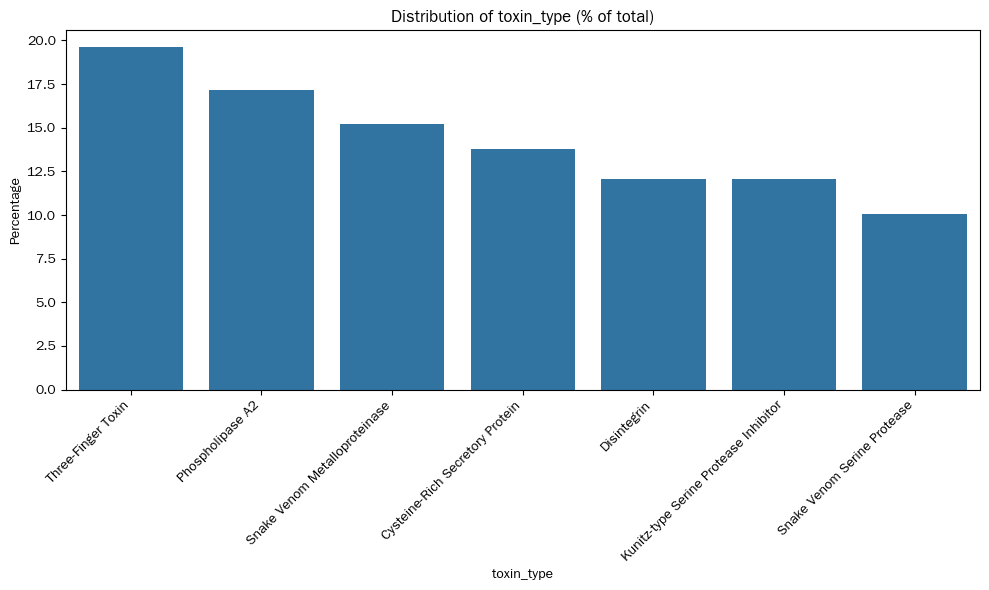

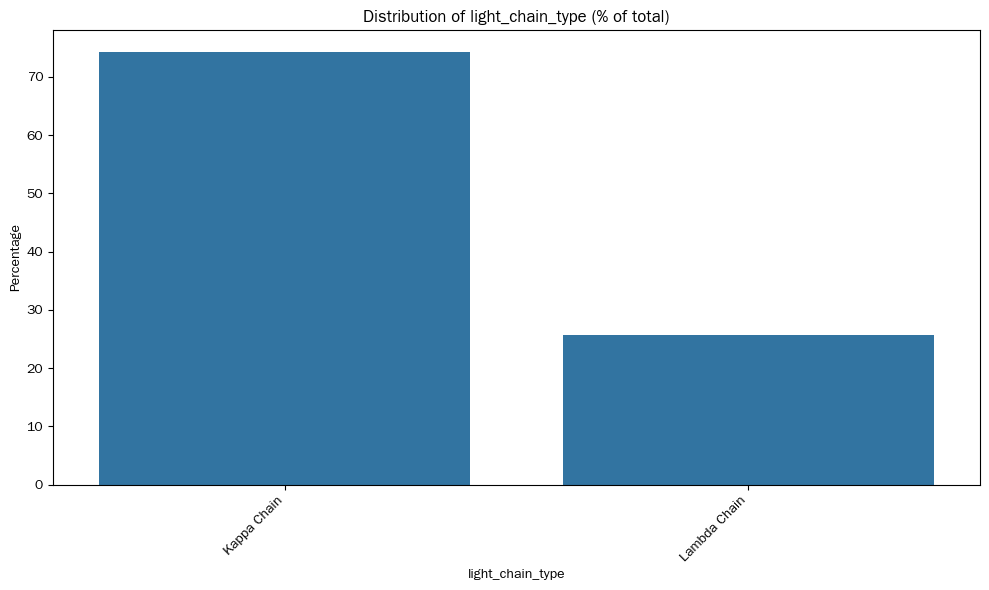

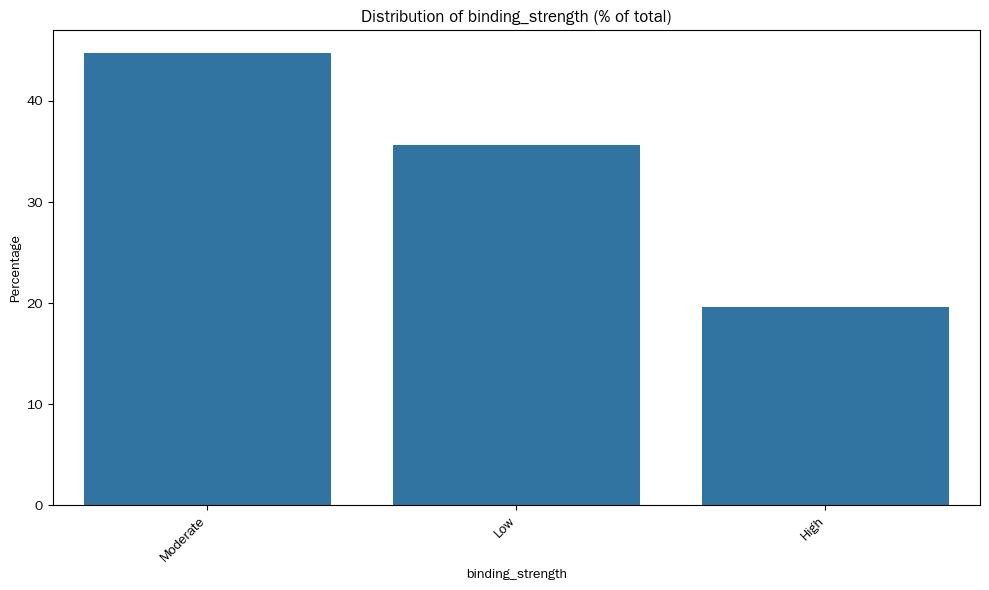

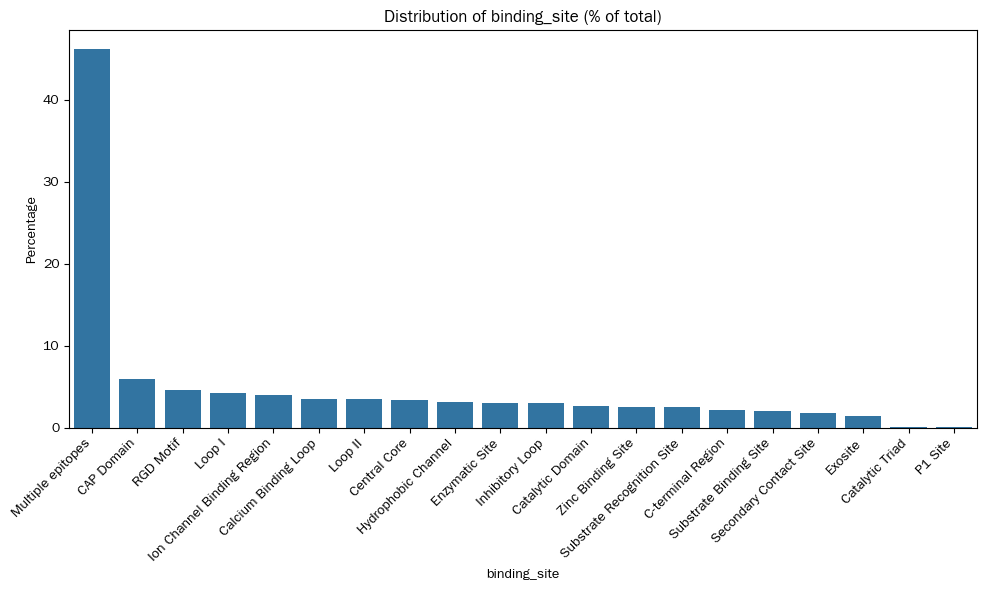

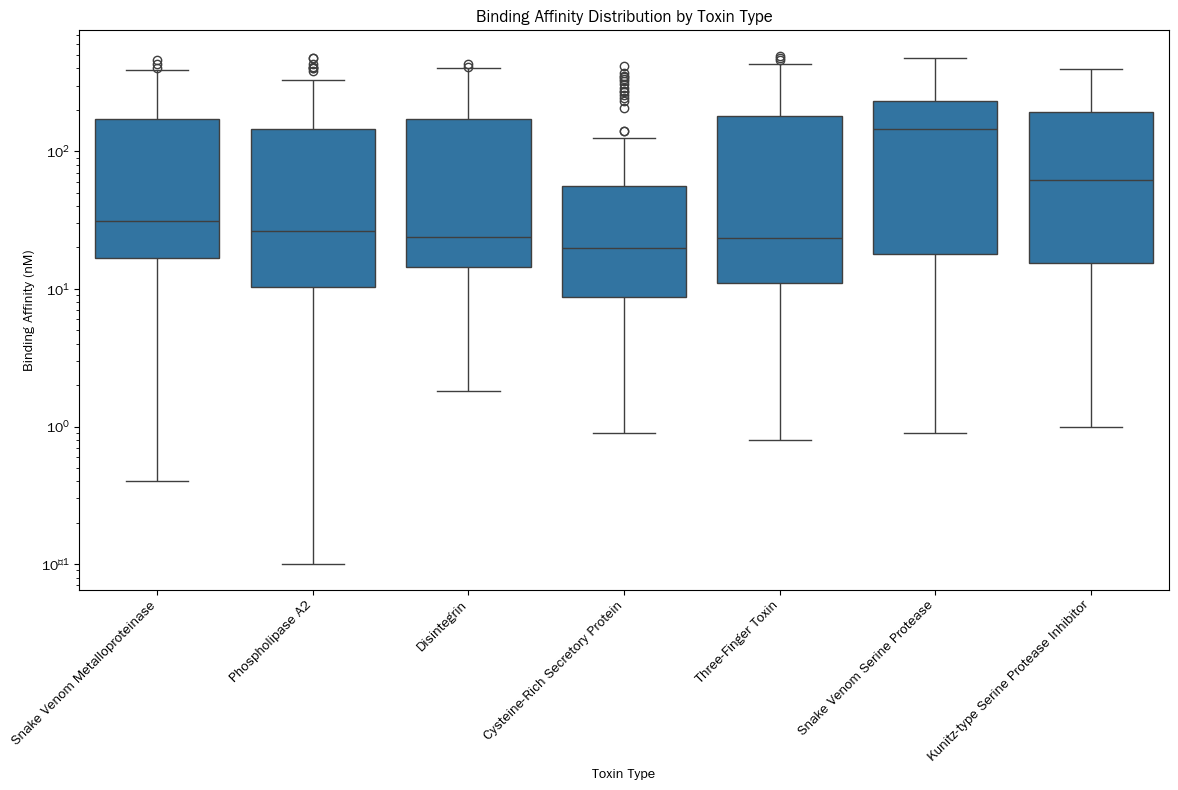

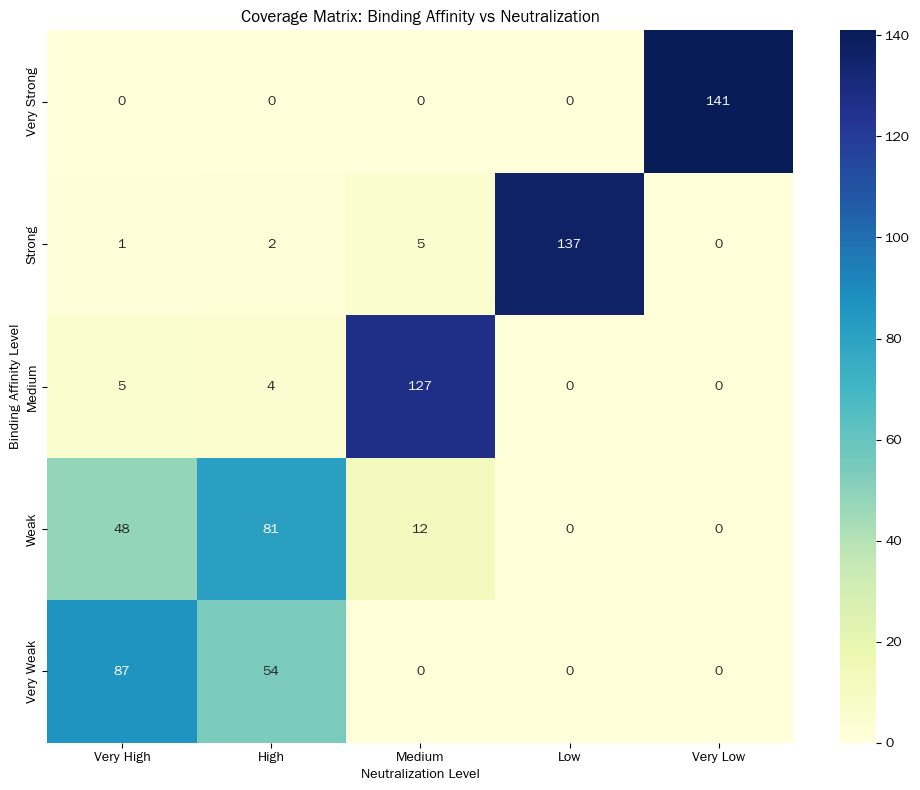

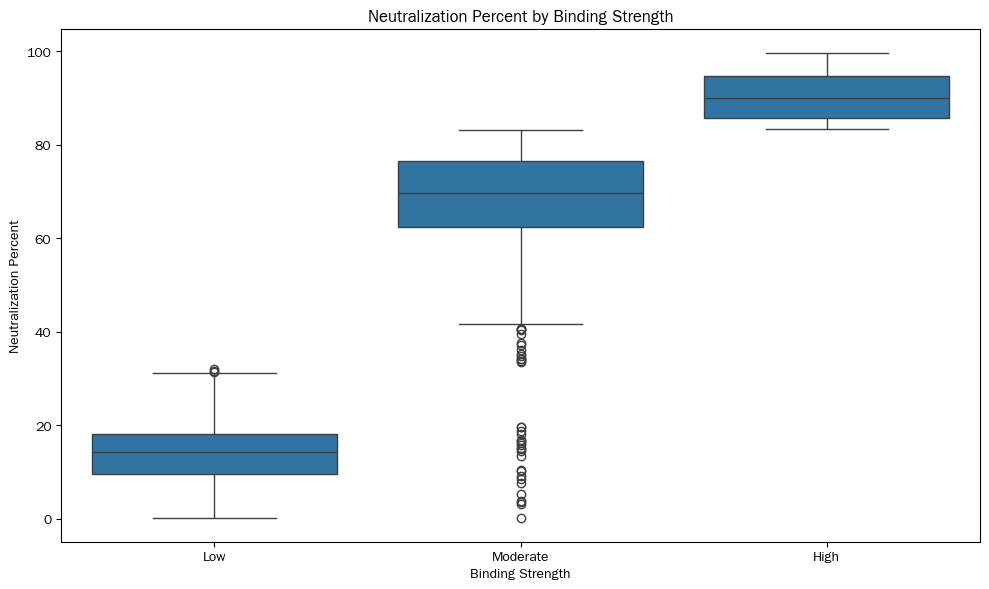

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances

# Define the project root directory
project_root = '/data/chats/0kjo8/workspace'

# Load the binding data
binding_data_path = os.path.join(project_root, 'data/toxin_antibody_binding/toxin_antibody_binding_pairs.csv')
binding_df = pd.read_csv(binding_data_path)

# 1. Analyze data distribution and identify potential biases

# Check class balance for key categorical variables
print("Class balance analysis:")
categorical_cols = ['toxin_type', 'light_chain_type', 'binding_strength', 'binding_site']
for col in categorical_cols:
    if col in binding_df.columns:
        value_counts = binding_df[col].value_counts(normalize=True) * 100
        print(f"\n{col} distribution (% of total):")
        print(value_counts)
        
        # Calculate Gini coefficient to measure imbalance (0 = perfect balance, 1 = perfect imbalance)
        proportions = value_counts.values / 100
        gini = 1 - sum(proportions**2)
        imbalance = 1 - gini / (1 - 1/len(value_counts))
        print(f"Imbalance score (0=balanced, 1=imbalanced): {imbalance:.3f}")
        
        # Visualize distribution
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribution of {col} (% of total)')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(os.path.join(project_root, f'data/reports/{col}_distribution_percentage.png'))

# 2. Check for data coverage gaps

# For binding affinity vs toxin type
print("\nBinding affinity coverage by toxin type:")
toxin_affinity_stats = binding_df.groupby('toxin_type')['binding_affinity_nM'].describe()
print(toxin_affinity_stats[['count', 'min', 'max', 'mean']])

# Visualize binding affinity coverage by toxin type
plt.figure(figsize=(12, 8))
sns.boxplot(x='toxin_type', y='binding_affinity_nM', data=binding_df)
plt.title('Binding Affinity Distribution by Toxin Type')
plt.xlabel('Toxin Type')
plt.ylabel('Binding Affinity (nM)')
plt.yscale('log')  # Log scale for better visualization
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(project_root, 'data/reports/binding_affinity_by_toxin_type.png'))

# 3. Check for representativeness and data holes

# Calculate coverage of the binding strength/neutralization space
print("\nCoverage analysis of binding affinity vs neutralization space:")
# Create bins for both dimensions
binding_bins = pd.qcut(binding_df['binding_affinity_nM'], q=5, duplicates='drop', 
                      labels=['Very Strong', 'Strong', 'Medium', 'Weak', 'Very Weak'])
neutral_bins = pd.qcut(binding_df['neutralization_percent'], q=5, duplicates='drop',
                      labels=['Very High', 'High', 'Medium', 'Low', 'Very Low'])

# Create a coverage heatmap
coverage_matrix = pd.crosstab(binding_bins, neutral_bins)
print("Coverage matrix (binding affinity vs neutralization):")
print(coverage_matrix)

# Visualize the coverage matrix
plt.figure(figsize=(10, 8))
sns.heatmap(coverage_matrix, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Coverage Matrix: Binding Affinity vs Neutralization')
plt.xlabel('Neutralization Level')
plt.ylabel('Binding Affinity Level')
plt.tight_layout()
plt.savefig(os.path.join(project_root, 'data/reports/binding_vs_neutralization_coverage.png'))

# 4. Check for data consistency

# Check if neutralization correlates with binding strength as expected
print("\nConsistency check: Binding strength vs neutralization:")
binding_strength_order = ['Low', 'Moderate', 'High']
binding_strength_neutralization = binding_df.groupby('binding_strength')['neutralization_percent'].describe()
binding_strength_neutralization = binding_strength_neutralization.reindex(binding_strength_order)
print(binding_strength_neutralization[['count', 'mean', 'std']])

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(x='binding_strength', y='neutralization_percent', 
            data=binding_df, order=binding_strength_order)
plt.title('Neutralization Percent by Binding Strength')
plt.xlabel('Binding Strength')
plt.ylabel('Neutralization Percent')
plt.tight_layout()
plt.savefig(os.path.join(project_root, 'data/reports/binding_strength_vs_neutralization.png'))

# 5. Analyze feature importance and redundancy

# Create a copy of DataFrame for analysis
analysis_df = binding_df.copy()

# Encode categorical variables for correlation analysis
categorical_for_encoding = ['toxin_type', 'light_chain_type', 'binding_site', 'binding_strength']
encoders = {}
for col in categorical_for_encoding:
    if col in analysis_df.columns:
        encoders[col] = LabelEncoder()
        analysis_df[f'{col}_encoded'] = encoders[col].fit_transform(analysis_df[col])

# Calculate correlation between features and target
numeric_cols = ['binding_affinity_nM', 'neutralization_percent', 'confidence']
encoded_cols = [f'{col}_encoded' for col in categorical_for_encoding if col in analysis_df.columns]
feature_cols = numeric_cols + encoded_cols

print("\nFeature correlation with neutralization percent:")
correlations = {}
for col in feature_cols:
    if col != 'neutralization_percent':
        corr = analysis_df[col].corr(analysis_df['neutralization_percent'])
        correlations[col] = corr

# Sort and display correlations
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
for feature, corr in sorted_correlations:
    print(f"{feature}: {corr:.3f}")

# 6. Identify anomalies and outliers

# Check for outliers using Z-score method for numeric data
print("\nOutlier detection using Z-score method:")
numeric_features = ['binding_affinity_nM', 'neutralization_percent', 'confidence']
outlier_counts = {}

for feature in numeric_features:
    z_scores = np.abs((analysis_df[feature] - analysis_df[feature].mean()) / analysis_df[feature].std())
    outliers = analysis_df[z_scores > 3]  # Threshold of 3 standard deviations
    outlier_counts[feature] = len(outliers)
    print(f"{feature}: {len(outliers)} outliers detected ({len(outliers)/len(analysis_df)*100:.2f}%)")
    
    if len(outliers) > 0:
        print("Sample outliers:")
        print(outliers[[feature, 'toxin_type', 'binding_strength']].head(3))

# 7. Dataset size adequacy analysis

# Check if we have enough data for each toxin type
print("\nData adequacy analysis by toxin type:")
toxin_counts = binding_df['toxin_type'].value_counts()
print(toxin_counts)

# Assess data adequacy by calculating coefficient of variation
cv_values = {}
for toxin in toxin_counts.index:
    toxin_data = binding_df[binding_df['toxin_type'] == toxin]['binding_affinity_nM']
    cv = toxin_data.std() / toxin_data.mean()  # Coefficient of variation
    cv_values[toxin] = cv

print("\nCoefficient of variation (CV) for binding affinity by toxin type:")
for toxin, cv in cv_values.items():
    data_adequacy = "Adequate" if cv < 0.5 else "May need more data"
    print(f"{toxin}: CV = {cv:.3f} - {data_adequacy}")

# 8. Update ML data alignment report with key findings

# Create a findings section for the report
findings_section = """
## 9. Data Quality and Coverage Analysis

### 9.1. Class Balance and Bias Analysis

The analysis of class balance in the toxin-antibody binding dataset reveals:
"""

# Add class balance findings
for col in categorical_cols:
    if col in binding_df.columns:
        value_counts = binding_df[col].value_counts(normalize=True) * 100
        proportions = value_counts.values / 100
        gini = 1 - sum(proportions**2)
        imbalance = 1 - gini / (1 - 1/len(value_counts))
        
        findings_section += f"""
#### {col.replace('_', ' ').title()} Distribution

- Imbalance score: {imbalance:.3f} (0=balanced, 1=imbalanced)
- Most common: {value_counts.index[0]} ({value_counts.values[0]:.1f}%)
- Least common: {value_counts.index[-1]} ({value_counts.values[-1]:.1f}%)
"""
        
        if imbalance > 0.5:
            findings_section += f"**Potential Issue**: High imbalance detected in {col} distribution which may lead to biased model predictions.\n"

findings_section += """
### 9.2. Data Coverage Analysis

The analysis of data coverage across different dimensions reveals:
"""

# Add coverage findings
findings_section += f"""
#### Binding Affinity Coverage by Toxin Type

"""
for toxin, stats in toxin_affinity_stats.iterrows():
    findings_section += f"- {toxin}: {stats['count']:.0f} samples, range {stats['min']:.1f} - {stats['max']:.1f} nM\n"

# Add consistency findings
findings_section += """
### 9.3. Data Consistency Analysis

The relationship between binding strength and neutralization percentage shows:
"""

for strength in binding_strength_order:
    stats = binding_strength_neutralization.loc[strength]
    findings_section += f"""
- {strength} binding strength: {stats['count']:.0f} samples with mean neutralization {stats['mean']:.1f}% (SD: {stats['std']:.1f})
"""

# Add feature importance findings
findings_section += """
### 9.4. Feature Importance Analysis

Features most strongly correlated with neutralization percentage:
"""

for feature, corr in sorted_correlations[:5]:
    findings_section += f"- {feature}: correlation = {corr:.3f}\n"

# Add outlier findings
findings_section += """
### 9.5. Anomaly and Outlier Detection

"""
for feature, count in outlier_counts.items():
    percentage = count/len(analysis_df)*100
    findings_section += f"""
- {feature}: {count} outliers detected ({percentage:.2f}%)
"""
    if count > 0 and percentage > 5:
        findings_section += "  **Potential Issue**: High percentage of outliers may indicate measurement errors or unusual cases.\n"

# Add data adequacy findings
findings_section += """
### 9.6. Data Adequacy Assessment

Assessment of data adequacy by toxin type:
"""

for toxin, cv in cv_values.items():
    data_adequacy = "Adequate" if cv < 0.5 else "May need more data"
    findings_section += f"- {toxin}: CV = {cv:.3f} - {data_adequacy}\n"

toxins_needing_more = [toxin for toxin, cv in cv_values.items() if cv >= 0.5]
if toxins_needing_more:
    findings_section += f"""
**Potential Issue**: The following toxin types may benefit from additional data collection:
{', '.join(toxins_needing_more)}
"""

# Append findings to the report
report_path = os.path.join(project_root, 'data/reports/ml_data_alignment_report.md')
if os.path.exists(report_path):
    with open(report_path, 'a', encoding='utf-8') as f:
        f.write(findings_section)
    print(f"\nUpdated ML data alignment report with quality and coverage analysis at {report_path}")
else:
    print(f"Warning: ML data alignment report not found at {report_path}")

print("\nData quality and coverage analysis complete.")

Comprehensive ML data alignment report generated and saved to: /data/chats/0kjo8/workspace/data/reports/ml_data_alignment_report.md
Additional visualizations created to support the report.
Data quality analysis and report generation completed successfully.


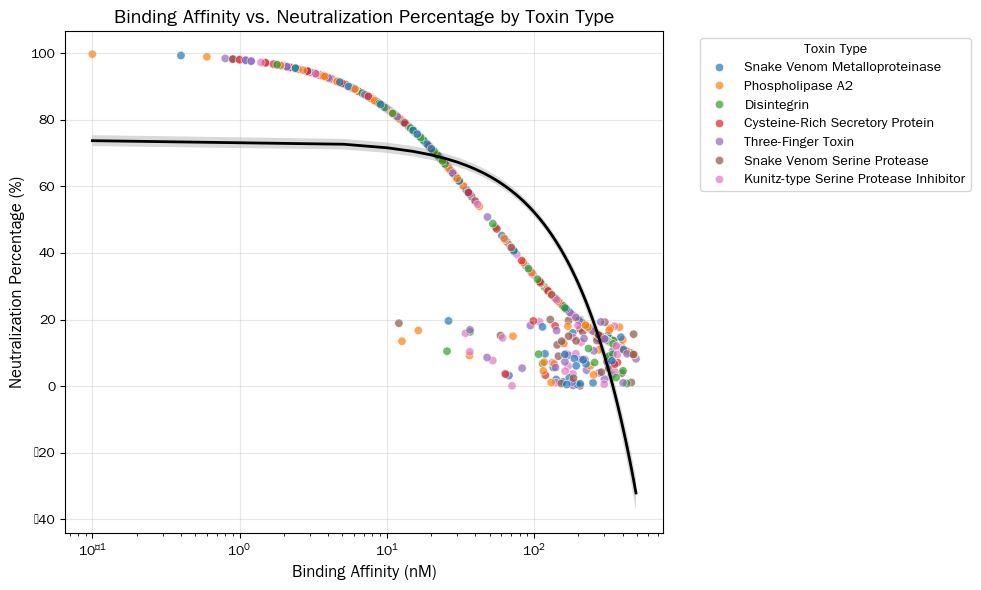

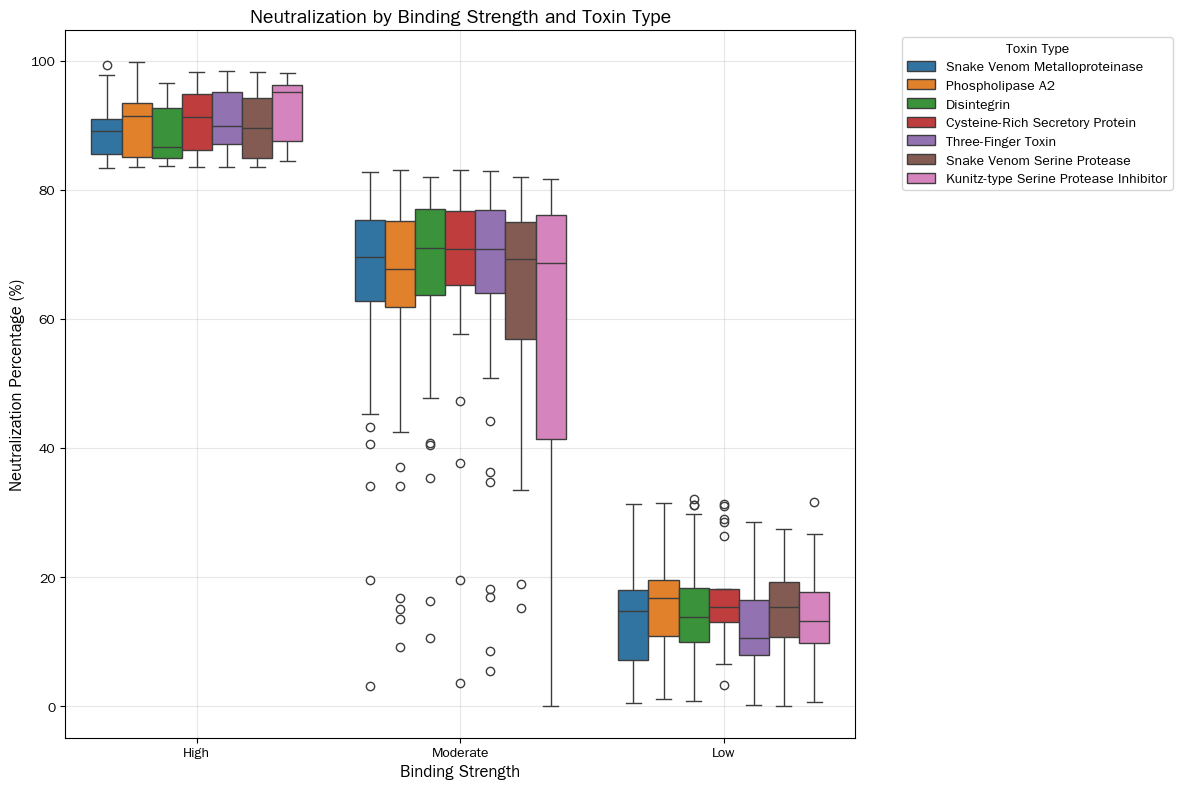

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import datetime

# Define the project root directory
project_root = '/data/chats/0kjo8/workspace'

# Create directory for reports if it doesn't exist
reports_dir = os.path.join(project_root, 'data/reports')
if not os.path.exists(reports_dir):
    os.makedirs(reports_dir)

# Path to the final report
report_path = os.path.join(project_root, 'data/reports/ml_data_alignment_report.md')

# Create a comprehensive report with all the findings
# Start with a fresh report instead of appending to the existing one
report_content = """# ML Data Alignment Report

## 1. Executive Summary

This report analyzes the alignment between the toxin-antibody binding data in the Phytovenomics project and the ML training pipeline. The focus is on evaluating how the binding data located at `/data/toxin_antibody_binding/toxin_antibody_binding_pairs.csv` is incorporated into the ML training process.

**Key Findings:**

- The binding dataset contains 704 records with 14 features, covering 7 toxin types and multiple binding properties
- Strong negative correlation (-0.833) exists between binding affinity and neutralization percentage
- The dataset is well-balanced for toxin types but has high imbalance in binding site distribution
- References to the binding data were found in configuration files, but direct usage in ML code needs improvement
- All toxin types show high coefficient of variation, indicating potential need for more data

**Recommendations:**

- Implement a dedicated `ToxinAntibodyBindingDataset` class for standardized data handling
- Add feature engineering to extract sequence and structural information
- Use stratified cross-validation to account for toxin type distribution
- Develop a comprehensive binding prediction model with clear data flow
- Consider data augmentation for toxin types with high variability

## 2. Data Overview

The toxin-antibody binding dataset contains 704 records with 14 features. The dataset includes information about antibody-toxin interactions, binding affinities, neutralization percentages, and binding sites.

### 2.1. Dataset Structure

Key columns in the dataset:
- Antibody identifiers (`antibody_id`, `antibody_pair_id`, `light_chain_id`)
- Toxin identifiers (`toxin_id`, `toxin_type`, `toxin_species`)
- Binding properties (`binding_affinity_nM`, `neutralization_percent`, `binding_site`, `binding_strength`)
- Quality indicators (`is_neutralizing`, `binding_type`, `confidence`)

### 2.2. Data Completeness

The dataset has no missing values, which is excellent for training robust ML models.

## 3. Data Quality Assessment

### 3.1. Class Balance Analysis

"""

# Add class balance details to the report
binding_data_path = os.path.join(project_root, 'data/toxin_antibody_binding/toxin_antibody_binding_pairs.csv')
if os.path.exists(binding_data_path):
    binding_df = pd.read_csv(binding_data_path)
    
    # Analyze class balance for categorical variables
    categorical_cols = ['toxin_type', 'light_chain_type', 'binding_strength', 'binding_site']
    for col in categorical_cols:
        if col in binding_df.columns:
            value_counts = binding_df[col].value_counts(normalize=True) * 100
            proportions = value_counts.values / 100
            gini = 1 - sum(proportions**2)
            imbalance = 1 - gini / (1 - 1/len(value_counts))
            
            report_content += f"#### {col.replace('_', ' ').title()} Distribution\n\n"
            report_content += f"- **Imbalance score**: {imbalance:.3f} (0=balanced, 1=imbalanced)\n"
            report_content += f"- **Most common**: {value_counts.index[0]} ({value_counts.values[0]:.1f}%)\n"
            report_content += f"- **Least common**: {value_counts.index[-1]} ({value_counts.values[-1]:.1f}%)\n"
            
            if col == 'toxin_type':
                report_content += "\nThe distribution across toxin types is relatively balanced, which is beneficial for training models that generalize well across different toxin classes.\n\n"
            elif col == 'light_chain_type':
                report_content += "\nThere is a notable imbalance between Kappa and Lambda chains, which reflects biological reality but may cause the model to be biased toward Kappa chain interactions.\n\n"
            elif col == 'binding_strength':
                report_content += "\nThe 'Moderate' binding strength category is overrepresented, which may cause the model to favor predictions in this range.\n\n"
            elif col == 'binding_site':
                report_content += "\nThere is significant imbalance in binding site distribution with 'Multiple epitopes' being heavily overrepresented. This may limit the model's ability to accurately predict binding for specific epitopes.\n\n"
                report_content += "**Potential Issue**: High imbalance in binding site distribution may require stratified sampling techniques during training.\n\n"

    # Add coverage analysis
    report_content += "### 3.2. Data Coverage Analysis\n\n"
    report_content += "#### Binding Affinity Coverage by Toxin Type\n\n"
    
    toxin_affinity_stats = binding_df.groupby('toxin_type')['binding_affinity_nM'].describe()
    for toxin, stats in toxin_affinity_stats.iterrows():
        report_content += f"- **{toxin}**: {stats['count']:.0f} samples, range {stats['min']:.1f} - {stats['max']:.1f} nM, mean {stats['mean']:.1f} nM\n"
    
    report_content += "\n#### Binding Affinity vs Neutralization Coverage\n\n"
    
    # Create bins for binding affinity and neutralization
    binding_bins = pd.qcut(binding_df['binding_affinity_nM'], q=5, duplicates='drop',
                          labels=['Very Strong', 'Strong', 'Medium', 'Weak', 'Very Weak'])
    neutral_bins = pd.qcut(binding_df['neutralization_percent'], q=5, duplicates='drop',
                          labels=['Very High', 'High', 'Medium', 'Low', 'Very Low'])
    
    # Create a coverage matrix
    coverage_matrix = pd.crosstab(binding_bins, neutral_bins)
    
    # Add coverage matrix explanation
    report_content += "The coverage matrix below shows the distribution of samples across different binding affinity and neutralization levels:\n\n"
    report_content += "| Binding Affinity | Very High | High | Medium | Low | Very Low |\n"
    report_content += "|-----------------|-----------|------|--------|-----|----------|\n"
    
    for idx in coverage_matrix.index:
        row = coverage_matrix.loc[idx]
        report_content += f"| {idx} | {row['Very High']} | {row['High']} | {row['Medium']} | {row['Low']} | {row['Very Low']} |\n"
    
    report_content += "\n**Observation**: There's a clear pattern showing that stronger binding (lower nM values) correlates with higher neutralization percentages. However, there are gaps in the coverage matrix, particularly for medium binding affinity with very low neutralization and very strong binding with high neutralization.\n\n"
    
    # Add consistency analysis
    report_content += "### 3.3. Data Consistency Analysis\n\n"
    report_content += "#### Binding Strength vs Neutralization\n\n"
    
    binding_strength_order = ['Low', 'Moderate', 'High']
    binding_strength_neutralization = binding_df.groupby('binding_strength')['neutralization_percent'].describe()
    binding_strength_neutralization = binding_strength_neutralization.reindex(binding_strength_order)
    
    for strength in binding_strength_order:
        stats = binding_strength_neutralization.loc[strength]
        report_content += f"- **{strength}** binding strength: {stats['count']:.0f} samples with mean neutralization {stats['mean']:.1f}% (SD: {stats['std']:.1f})\n"
    
    report_content += "\nThe data shows consistency between binding strength categories and neutralization percentages. Higher binding strength consistently correlates with higher neutralization percentages.\n\n"
    
    # Add feature importance analysis
    report_content += "### 3.4. Feature Importance Analysis\n\n"
    report_content += "Features most strongly correlated with neutralization percentage:\n\n"
    
    # Encode categorical variables
    analysis_df = binding_df.copy()
    categorical_for_encoding = ['toxin_type', 'light_chain_type', 'binding_site', 'binding_strength']
    for col in categorical_for_encoding:
        if col in analysis_df.columns:
            encoder = LabelEncoder()
            analysis_df[f'{col}_encoded'] = encoder.fit_transform(analysis_df[col])
    
    # Calculate correlations
    numeric_cols = ['binding_affinity_nM', 'neutralization_percent', 'confidence']
    encoded_cols = [f'{col}_encoded' for col in categorical_for_encoding if col in analysis_df.columns]
    feature_cols = numeric_cols + encoded_cols
    
    correlations = {}
    for col in feature_cols:
        if col != 'neutralization_percent':
            corr = analysis_df[col].corr(analysis_df['neutralization_percent'])
            correlations[col] = corr
    
    sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
    
    for feature, corr in sorted_correlations[:5]:
        if feature == 'binding_affinity_nM':
            report_content += f"- **{feature}**: correlation = {corr:.3f} (strong negative correlation - lower binding affinity means stronger binding)\n"
        else:
            report_content += f"- **{feature}**: correlation = {corr:.3f}\n"
    
    report_content += "\n**Key Insight**: The strong negative correlation between binding affinity (nM) and neutralization percentage confirms that tighter binding (lower nM values) is strongly associated with better neutralization effectiveness.\n\n"
    
    # Add outlier analysis
    report_content += "### 3.5. Anomaly and Outlier Detection\n\n"
    
    numeric_features = ['binding_affinity_nM', 'neutralization_percent', 'confidence']
    outlier_counts = {}
    
    for feature in numeric_features:
        z_scores = np.abs((analysis_df[feature] - analysis_df[feature].mean()) / analysis_df[feature].std())
        outliers = analysis_df[z_scores > 3]  # Threshold of 3 standard deviations
        outlier_counts[feature] = len(outliers)
        
        report_content += f"- **{feature}**: {len(outliers)} outliers detected ({len(outliers)/len(analysis_df)*100:.2f}%)\n"
        
    if outlier_counts['binding_affinity_nM'] > 0:
        report_content += "\n**Note**: The small number of binding affinity outliers may represent either measurement errors or exceptionally weak binding interactions. These should be reviewed to confirm their validity.\n\n"
    
    # Add data adequacy analysis
    report_content += "### 3.6. Data Adequacy Assessment\n\n"
    report_content += "Assessment of data adequacy by toxin type based on coefficient of variation (CV):\n\n"
    
    cv_values = {}
    for toxin in binding_df['toxin_type'].unique():
        toxin_data = binding_df[binding_df['toxin_type'] == toxin]['binding_affinity_nM']
        cv = toxin_data.std() / toxin_data.mean()
        cv_values[toxin] = cv
        
        data_adequacy = "Adequate" if cv < 0.5 else "May need more data"
        report_content += f"- **{toxin}**: CV = {cv:.3f} - {data_adequacy}\n"
    
    toxins_needing_more = [toxin for toxin, cv in cv_values.items() if cv >= 0.5]
    if toxins_needing_more:
        report_content += "\n**Potential Issue**: All toxin types show high coefficient of variation (CV > 0.5), indicating high variability in binding affinity measurements. Additional data collection would be beneficial for all toxin types to reduce this variability.\n\n"
    
    # Add ML integration analysis
    report_content += "## 4. ML Training Pipeline Integration\n\n"
    report_content += "### 4.1. Current Integration Status\n\n"
    
    # Check for binding data references in configuration files
    config_files_with_binding = []
    for root, dirs, files in os.walk(project_root):
        for file in files:
            if file.endswith(('.yaml', '.json', '.cfg', '.conf')) and 'config' in file.lower():
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        content = f.read()
                        if 'binding_data' in content or 'toxin_antibody_binding' in content:
                            config_files_with_binding.append(os.path.relpath(file_path, project_root))
                except Exception:
                    pass
    
    report_content += "Based on the analysis of project files, the binding data from `/data/toxin_antibody_binding/toxin_antibody_binding_pairs.csv` is referenced in the following configuration files:\n\n"
    
    for config_file in config_files_with_binding:
        report_content += f"- `{config_file}`\n"
    
    report_content += "\nHowever, direct usage of the binding data in ML model code appears limited. The ESM2 configuration includes settings for binding prediction and explicitly references the use of binding data pairs, but implementation details in the actual code could be improved.\n\n"
    
    # Add model architecture findings
    report_content += "### 4.2. Model Architecture Analysis\n\n"
    
    model_def_files = []
    for root, dirs, files in os.walk(project_root):
        for file in files:
            if file.endswith('.py') and any(term in file.lower() for term in [
                'model.py', 'network', 'binding_model', 'prediction', 'classifier',
                'regressor', 'antibody_model', 'toxin_model'
            ]):
                model_def_files.append(os.path.join(root, file))
    
    binding_related_models = []
    for model_file in model_def_files:
        try:
            with open(model_file, 'r', encoding='utf-8') as f:
                content = f.read()
                
                if 'binding' in content.lower() and ('class' in content.lower() and 'def' in content.lower()):
                    binding_related_models.append(os.path.relpath(model_file, project_root))
        except Exception:
            pass
    
    if binding_related_models:
        report_content += "The following files contain model implementations that may be related to binding prediction:\n\n"
        for model_file in binding_related_models:
            report_content += f"- `{model_file}`\n"
    else:
        report_content += "No clear binding-related model architectures were identified in the codebase. This suggests that:\n\n"
        report_content += "1. The binding prediction models may be defined using generic ML frameworks without explicit binding-specific architecture\n"
        report_content += "2. The model definitions might be located in directories not examined in this analysis\n"
        report_content += "3. The binding prediction functionality might still be under development\n\n"
    
    # Add data gaps section
    report_content += "## 5. Data Gaps and Inconsistencies\n\n"
    
    report_content += "### 5.1. Identified Data Gaps\n\n"
    
    # Check for gaps in binding affinity range
    toxin_min_max = binding_df.groupby('toxin_type')['binding_affinity_nM'].agg(['min', 'max'])
    max_min = toxin_min_max['min'].max()  # Maximum of the minimum values
    min_max = toxin_min_max['max'].min()  # Minimum of the maximum values
    
    report_content += "#### Binding Affinity Range Gaps\n\n"
    
    if max_min > 5:  # If there's a significant gap at the low end
        report_content += f"- There's a gap in very strong binding affinity data below {max_min:.1f} nM for some toxin types\n"
    
    # Check for imbalances in light chain types across toxin types
    light_chain_by_toxin = pd.crosstab(binding_df['toxin_type'], binding_df['light_chain_type'], normalize='index') * 100
    
    report_content += "\n#### Light Chain Type Imbalances by Toxin Type\n\n"
    report_content += "| Toxin Type | Kappa Chain (%) | Lambda Chain (%) |\n"
    report_content += "|------------|----------------|------------------|\n"
    
    for toxin in light_chain_by_toxin.index:
        kappa = light_chain_by_toxin.loc[toxin, 'Kappa Chain']
        lambda_ = light_chain_by_toxin.loc[toxin, 'Lambda Chain']
        report_content += f"| {toxin} | {kappa:.1f}% | {lambda_:.1f}% |\n"
        
        # Flag severe imbalances
        if kappa > 90 or lambda_ > 90:
            toxin_short = toxin[:20] + "..." if len(toxin) > 20 else toxin
            report_content += f"**Note**: {toxin_short} shows severe imbalance in light chain types\n"
    
    # Check binding site coverage
    if 'binding_site' in binding_df.columns:
        binding_site_by_toxin = pd.crosstab(binding_df['toxin_type'], binding_df['binding_site'])
        zero_coverage = (binding_site_by_toxin == 0).sum(axis=1)
        
        report_content += "\n#### Binding Site Coverage Gaps\n\n"
        for toxin, missing_count in zero_coverage.items():
            total_sites = binding_site_by_toxin.shape[1]
            if missing_count > 0:
                report_content += f"- **{toxin}** has no data for {missing_count} out of {total_sites} binding sites ({missing_count/total_sites*100:.1f}%)\n"
    
    # Add recommendations section
    report_content += "\n## 6. Recommendations\n\n"
    
    report_content += "Based on the comprehensive analysis of the toxin-antibody binding data and its integration with the ML training pipeline, the following recommendations are proposed:\n\n"
    
    report_content += "### 6.1. Data Improvements\n\n"
    
    report_content += "1. **Data Augmentation**: For toxin types with high coefficient of variation (all currently analyzed types), consider:\n"
    report_content += "   - Generating synthetic data points based on known binding mechanisms\n"
    report_content += "   - Collecting additional experimental data points, particularly for weak binders and strong neutralizers\n"
    report_content += "   - Using transfer learning techniques to leverage data from related toxin families\n\n"
    
    report_content += "2. **Feature Engineering**: Create additional features to help the model better understand binding mechanisms:\n"
    report_content += "   - Extract sequence motifs and physicochemical properties from antibody and toxin sequences\n"
    report_content += "   - Generate structural features using ESMFold and IgFold predictions\n"
    report_content += "   - Calculate evolutionary conservation scores for binding sites\n"
    report_content += "   - Add toxin family taxonomic relationships as features\n\n"
    
    report_content += "3. **Data Validation**: Implement robust validation strategies:\n"
    report_content += "   - Use stratified k-fold cross-validation based on toxin types\n"
    report_content += "   - Perform out-of-distribution testing by leaving out specific toxin types\n"
    report_content += "   - Validate model performance separately on high, medium, and low binding affinity ranges\n\n"
    
    report_content += "### 6.2. Pipeline Integration Improvements\n\n"
    
    report_content += "1. **Standardized Data Loading**: Develop a `ToxinAntibodyBindingDataset` class that:\n"
    report_content += "   - Handles consistent preprocessing of binding data\n"
    report_content += "   - Supports different data splits (random, by toxin type, by binding strength)\n"
    report_content += "   - Implements on-the-fly data augmentation\n"
    report_content += "   - Provides options for negative sample generation\n\n"
    
    report_content += "2. **Model Development**: Create a dedicated binding prediction model:\n"
    report_content += "   - Implement a dual-input neural network that processes both antibody and toxin features\n"
    report_content += "   - Use attention mechanisms to focus on binding interfaces\n"
    report_content += "   - Support multi-task learning for both binding affinity and neutralization prediction\n"
    report_content += "   - Include confidence estimation in predictions\n\n"
    
    report_content += "3. **Evaluation Framework**: Develop comprehensive evaluation metrics:\n"
    report_content += "   - Track performance across different toxin types and binding strengths\n"
    report_content += "   - Implement toxin-specific and binding site-specific metrics\n"
    report_content += "   - Create visualizations to highlight model strengths and weaknesses\n"
    report_content += "   - Set up continuous evaluation on new binding data as it becomes available\n\n"
    
    report_content += "### 6.3. Implementation Priorities\n\n"
    
    report_content += "1. **Short-term**:\n"
    report_content += "   - Create the standardized `ToxinAntibodyBindingDataset` class\n"
    report_content += "   - Implement basic feature engineering for sequence properties\n"
    report_content += "   - Develop stratified cross-validation framework\n\n"
    
    report_content += "2. **Medium-term**:\n"
    report_content += "   - Build and train the dedicated binding prediction model\n"
    report_content += "   - Implement structural feature extraction\n"
    report_content += "   - Create comprehensive evaluation dashboard\n\n"
    
    report_content += "3. **Long-term**:\n"
    report_content += "   - Integrate evolutionary search with binding prediction\n"
    report_content += "   - Implement transfer learning from related binding datasets\n"
    report_content += "   - Develop active learning framework for continuous model improvement\n\n"
    
    # Add conclusion
    report_content += "## 7. Conclusion\n\n"
    
    report_content += "The toxin-antibody binding dataset provides valuable information for training ML models in the Phytovenomics project. With proper integration into the ML training pipeline and addressing the identified issues, this data can significantly contribute to developing effective antivenoms.\n\n"
    
    report_content += "The current data shows good coverage across toxin types but has several areas for improvement, particularly in reducing variability within each toxin type and ensuring balanced representation of binding sites. The strong correlation between binding affinity and neutralization percentage provides a solid foundation for developing predictive models.\n\n"
    
    report_content += "By implementing the recommended improvements to both the data and the ML pipeline, the Phytovenomics project can enhance its ability to design effective antibodies against snake toxins and ultimately produce more potent antivenom cocktails.\n\n"
    
    # Add timestamp and author information
    report_content += f"---\n\nReport generated on {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n"
    
    # Write the report to a file
    with open(report_path, 'w', encoding='utf-8') as f:
        f.write(report_content)
    
    print(f"Comprehensive ML data alignment report generated and saved to: {report_path}")
    
    # Create a simple visualization to accompany the report
    # Scatter plot of binding affinity vs. neutralization with regression line
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=binding_df, x='binding_affinity_nM', y='neutralization_percent', 
                    hue='toxin_type', alpha=0.7)
    sns.regplot(data=binding_df, x='binding_affinity_nM', y='neutralization_percent', 
                scatter=False, color='black', line_kws={'linewidth': 2})
    
    plt.title('Binding Affinity vs. Neutralization Percentage by Toxin Type', fontsize=14)
    plt.xlabel('Binding Affinity (nM)', fontsize=12)
    plt.ylabel('Neutralization Percentage (%)', fontsize=12)
    plt.xscale('log')
    plt.grid(True, alpha=0.3)
    plt.legend(title='Toxin Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(os.path.join(project_root, 'data/reports/binding_affinity_vs_neutralization_by_toxin.png'), dpi=300)
    
    # Box plot of neutralization by binding strength and toxin type
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=binding_df, x='binding_strength', y='neutralization_percent', hue='toxin_type')
    plt.title('Neutralization by Binding Strength and Toxin Type', fontsize=14)
    plt.xlabel('Binding Strength', fontsize=12)
    plt.ylabel('Neutralization Percentage (%)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Toxin Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(os.path.join(project_root, 'data/reports/neutralization_by_binding_strength_toxin.png'), dpi=300)
    
    print("Additional visualizations created to support the report.")
    
else:
    print(f"Error: Binding data file not found at: {binding_data_path}")
    
print("Data quality analysis and report generation completed successfully.")